![image](images/the-kenya-film-classification-board-kfcb-is-responsible-for-regulating-KW45BP.jpg)

# **Project: Automating Classification of Audio-Visual Content and Rating for Regulation and Personal Use**

## 1. **Business understanding**

The core mandate of the government regulator of audiovisual content in Kenya is to classify and rate audiovisual content for age appropriateness (GE, PG, 16, 18, and Restricted) as per the Film Classification Guidelines for 2012. These guidelines establish a quantifiable rating scale from 0 to 5 based on the frequency and intensity of classifiable elements:

* **0 – 1: Low Impact** classifiable elements – **General Exhibition (GE)**

* **2: Mild Impact** classifiable elements – **Parental Guidance (PG)**

* **3: Moderate Impact** classifiable elements – **16**

* **4: Strong Impact** classifiable elements – **

* **5: Extreme Impact** classifiable elements – **Restricted**

### 1.1  Business Problem Statement
The exponential growth of film and digital media production, particularly on platforms like TikTok and YouTube, presents a significant challenge to the current manual content review and classification process. Manually classifying thousands of diverse entries, each with unique genres, synopses, and origins, is:

* **Time-consuming:** Leading to significant backlogs and delayed content release.

* **Resource-intensive:** Requiring a large team of human examiners.

* **Prone to inconsistencies:** Subjectivity in manual review can lead to varied classification outcomes.

This project addresses these challenges by developing a machine learning model capable of predicting a film’s classification rating (GE, PG, 16, 18, Restricted) based on its intrinsic attributes such as genre, synopsis, class of film, duration, country of origin, and distribution platform, alongside other available metadata.

### **Project Objectives & Value Proposition**
The automation achieved through this project will deliver multi-faceted value:

* **Enhanced Regulatory Efficiency:** Provide rapid, data-driven rating suggestions to film examiners, significantly reducing the manual workload and accelerating the classification process.

* **Improved Parental Control Tools:** Empower parents with an automated mechanism to flag potentially inappropriate audiovisual content for children, fostering safer viewing environments.

* **Advanced Content Recommendation Systems:** Facilitate the development of sophisticated recommendation engines that filter audiovisual content based on age-appropriateness profiles and individual user interests.

Support for Local Content Categorization: Promote and streamline the categorization of films produced within Kenya, aiding in cultural preservation and industry growth.
###  **Domain of Application**
This project operates at the nexus of several critical domains:

* **Media and Entertainment:** Streamlining content management, accessibility, and compliance for various media outlets and platforms.

* **Government and Regulatory Compliance:** Offering a technological solution for regulatory bodies (e.g., KFCB) to efficiently manage and classify a high volume of content.

* **Natural Language Processing (NLP) & Machine Learning (ML):** Applying advanced NLP techniques for text classification (synopsis analysis) and supervised machine learning for predictive modeling.

* **Educational Technology:** Contributing to the development of systems for age-appropriate content filtering and robust parental control mechanisms.

### **Target**
The primary beneficiaries and key stakeholders for this solution include:

* **Kenya Film Classification Board - KFCB):** As the direct end-users, benefiting from automated rating assignment and improved operational efficiency.

* **Streaming Service Providers (e.g., Netflix, Maisha Magic, Showmax, YouTube):** To streamline internal content tagging, ensure compliance, and enhance content discovery.

* **Parents and Educators:** Requiring effective safeguards and tools for ensuring children's access to age-appropriate viewing content.

* **Developers:** Working on content recommendation systems or age-gating features, who require structured and accurate metadata.


## 2. Data understanding
The project leverages historical film classification data meticulously sourced from the Kenya Film Classification Board (KFCB), spanning the years 2022 to 2025. This rich dataset comprises several key attributes for each audiovisual content entry:

* `film_title`: The official name of the content.

* `genre`: Categorization of the film's style (e.g., Action, Drama, Comedy).

* `synopsis`: A textual summary of the film's plot and content, critical for understanding themes and elements.
`
* `official_rating` (Target Variable): The classified age-appropriateness rating (GE, PG, 16, 18, Restricted), which is the label our model will predict.

* `platform`: The distribution channel (e.g., Cinema, Showmax, YouTube).

* `duration`: Length of the content in minutes.

* `classification_date`: The date when the content was officially classified.

* `country_of_origin`: The primary country where the film was produced.

* `class_of_film`: Type of film (e.g., Series, Feature, Short).

* `cai` (Content Advisory Information): Specific advisory elements (e.g., Violence, Alcohol, Sex, Language), often in a multi-valued categorical format.

* `venue`: Where the classification was conducted or intended for.

* `client`: The entity requesting classification.

* `contact`: Contact information for the client (likely to be dropped or used as an identifier).

* `website`: Associated website (likely to be dropped or used as an identifier).

* `justification`: Textual explanation for the given rating (potentially useful for advanced NLP or dropped).
The quality and completeness of these attributes will be assessed during the Data Preparation phase.

## 3. **Data Preparation**
The data preparation phase is critical for transforming raw KFCB data into a format suitable for machine learning. This involves several key steps:

### **3.1 Data Collection & Initial Loading**
* Gathering all available audiovisual content classification records from KFCB for the specified period (2022-2025).

* Loading the dataset into a suitable analytical environment (e.g., Pandas DataFrame).

### **3.2 Handling Missing Values**
* **Identification:** Systematically identify missing values across all features.

* **Strategy Development** Based on the nature and extent of missingness, devise appropriate imputation or removal strategies:

- * **Categorical Features:** Imputation with mode, a new 'unknown' category, or removal of rows/columns if missing extensively.

- * **Numerical Features:** Imputation with mean, median, or predictive imputation.

- * **Text Features** (`synopsis`, `justification`): Handle missing text as empty strings or specific placeholder tokens to prevent errors in NLP processing.

### 3.3 **Feature Engineering**
****Date Feature Extraction:**** The classification_date column will be leveraged to create new, numerically actionable features for the model:

* classification_year: Extracting the year.

* classification_month: Extracting the month (1-12).

* classification_day_of_week: Extracting the day of the week (e.g., 0 for Monday to 6 for Sunday).

* **Content Advisory Information (CAI) Transformation:** The cai column, often containing multiple advisory elements separated by commas (e.g., "V,S,L"), will be transformed using Multi-label Binarization or One-Hot Encoding to create distinct binary features for each advisory element (e.g., CAI_Violence, CAI_Sexual_Content, CAI_Language). This ensures each advisory is represented as a separate input.

### **3.4 Text Feature Extraction from Synopsis**
Text Preprocessing: The synopsis (and potentially justification) columns will undergo standard NLP preprocessing steps to prepare them for vectorization:

* **Lowercasing:** Convert all text to lowercase.

* **Punctuation Removal:** Eliminate punctuation marks.

* **Tokenization:** Split text into individual words or tokens.

* **Stop Word Removal:** Eliminate common words (e.g., "the", "is", "a") that carry little semantic meaning for classification.

* **Lemmatization/Stemming:** Reduce words to their base form to reduce dimensionality and group similar words (e.g., "running", "ran" -> "run").

* **Vectorization:** Apply TF-IDF (Term Frequency-Inverse Document Frequency) to convert the preprocessed text into numerical feature vectors, capturing the importance of words within a document relative to the entire corpus. max_features will be used to control dimensionality.

### **3.5 Categorical Feature**
**One-Hot Encoding** Categorical features such as genre, class_of_film, country_of_origin, venue, client, and platform will be converted into numerical format using One-Hot Encoding. This creates binary (0/1) columns for each unique category, preventing the model from inferring spurious ordinal relationships.

### **3.6 Numerical Feature Scaling**
**Standardization/Normalization:** Numerical features like duration_mins, classification_year, classification_month, and classification_day_of_week will be scaled (e.g., using StandardScaler) to ensure they contribute equally to the model and prevent features with larger ranges from dominating the learning process.

### **3.7 Column Management (Dropping Unnecessary Features)**
Columns identified as irrelevant or redundant for the prediction task, such as film_title, contact, website, and original_excel_index_col, will be systematically dropped from the dataset before training the ColumnTransformer. The justification column might also be dropped if its textual content isn't utilized by the model (or could be an additional text feature if its content is deemed relevant).

### **3.8 Building the Preprocessing Pipeline (ColumnTransformer)**
A sklearn.compose.ColumnTransformer will be constructed to encapsulate all the preprocessing steps. This ensures that the same transformations applied during training are consistently applied during prediction on new, unseen data.
## 4. Modeling

### Type of Problem

- **Multiclass classification** using both structured (duration, genre, platform) and unstructured (synopsis) data

### ML Algorithms Used


| Model                                 | Strength                                                                 |
|---------------------------------------|--------------------------------------------------------------------------|
| **Logistic Regression**               | Serves as a simple, interpretable baseline for classification tasks      |
| **Decision Tree Classifier**          | Easy to interpret, handles both numerical and categorical data           |
| **Random Forest Classifier**          | Reduces overfitting, handles feature interactions well                   |
| **Gradient Boosting - XGBoost**       | High performance, effective for imbalanced datasets and ranking features |
| **Gradient Boosting - LightGBM**      | Fast training speed and efficient memory usage on large datasets         |
| **Naive Bayes - MultinomialNB**       | Strong with high-dimensional, text-heavy data (e.g., TF or TF-IDF inputs)|
| **Support Vector Machine (LinearSVC)**| Effective for sparse, high-dimensional feature spaces (used with TF-IDF) |


##  8. Evaluation & Results

### Metrics used

- Accuracy
- Precision / Recall / F1 Score
- Confusion Matrix

## Deployment
We will using Streamlit app for Deployment

 

### Importing Essential Libraries

In [1]:
# Standard data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
from collections import Counter

# Suppress warnings
warnings.filterwarnings('ignore')

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Install required packages
import subprocess
def install_package(package):
    subprocess.check_call(['pip', 'install', package])

# Install packages needed
required_packages = ['xgboost', 'lightgbm', 'wordcloud', 'scikeras']
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        install_package(package)

# Machine learning preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Machine learning metrics
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    f1_score
)

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb

# NLP tools
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from collections import Counter
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import string

# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

from IPython.display import display

### Data Loading and Initial Review

In [2]:
# Define a function to load datasets with error handling
def load_dataset(file_path, header=None, index_col=0):
    """
    Load an Excel dataset with proper error handling
    
    Parameters:
    -----------
    file_path : str
        Path to the Excel file
    header : int or None
        Row to use as column names (0-indexed)
    index_col : int
        Column to use as index
        
    Returns:
    --------
    pandas.DataFrame or None
        The loaded dataframe or None if file not found
    """
    try:
        df = pd.read_excel(file_path, header=header, index_col=index_col)
        print(f"Successfully loaded: {file_path}")
        return df
    except FileNotFoundError:
        print(f"Error: '{file_path}' not found. Check path.")
        return None
    except Exception as e:
        print(f"Error loading {file_path}: {str(e)}")
        return None

# Define dataset paths
data_dir = 'Data/'
file_paths = [
    {'path': data_dir + 'Films Classified 2022-2023.xlsx', 'header': 0},
    {'path': data_dir + 'Films Classified 2023-2024.xlsx', 'header': 0},
    {'path': data_dir + 'Films Classified 2024-2025.xlsx', 'header': 0}
]

# Load all datasets
datasets = []
for i, file_info in enumerate(file_paths):
    df = load_dataset(file_info['path'], header=file_info['header'])
    if df is not None:
        datasets.append(df)
        globals()[f'df{i+1}'] = df  # Create df1, df2, df3 variables

# Print summary of loaded data
print("\nDataset Summary:")
for i, df in enumerate(datasets, 1):
    if df is not None:
        print(f"df{i}: {df.shape[0]} rows × {df.shape[1]} columns")

Successfully loaded: Data/Films Classified 2022-2023.xlsx
Successfully loaded: Data/Films Classified 2023-2024.xlsx
Successfully loaded: Data/Films Classified 2024-2025.xlsx

Dataset Summary:
df1: 784 rows × 15 columns
df2: 1012 rows × 15 columns
df3: 777 rows × 15 columns


#### Preview of the Dataframes

In [3]:
# --- Check df1 ---
print("\n--- Inspecting df1 ---")
if 'df1' in globals() and df1 is not None and not df1.empty:
    print(f"df1 shape: {df1.shape}")
    print("df1 columns:", df1.columns.tolist())
    print("df1 head():")
    display(df1.head())
    print("df1 info():")
    df1.info()
else:
    print("df1 is not loaded or is empty.")
print("-" * 50)

# --- Check df2 ---
print("\n--- Inspecting df2 ---")
if 'df2' in globals() and df2 is not None and not df2.empty:
    print(f"df2 shape: {df2.shape}")
    print("df2 columns (first 20):", df2.columns.tolist())
    print("df2 head():")
    display(df2.head())
    print("df2 info():")
    df2.info()
else:
    print("df2 is not loaded or is empty.")
print("-" * 50)

# --- Check df3 ---
print("\n--- Inspecting df3 ---")
if 'df3' in globals() and df3 is not None and not df3.empty:
    print(f"df3 shape: {df3.shape}")
    print("df3 columns (first 20):", df3.columns.tolist())
    print("df3 head():")
    display(df3.head())
    print("df3 info():")
    df3.info()
else:
    print("df3 is not loaded or is empty.")
print("-" * 50)


--- Inspecting df1 ---
df1 shape: (784, 15)
df1 columns: ['FILM TITLE', 'CLASS OF FILM', 'GENRE', 'SYNOPSIS', 'RATING', 'CAI', 'JUSTIFICATION', 'DURATION(MINS)', 'DATE CLASSIFIED', 'COUNTRY OF ORIGIN', 'VENUE', 'CLIENT', 'CONTACT', 'PLATFORM', 'WEBSITE']
df1 head():


,FILM TITLE,CLASS OF FILM,GENRE,SYNOPSIS,RATING,CAI,JUSTIFICATION,DURATION(MINS),DATE CLASSIFIED,COUNTRY OF ORIGIN,VENUE,CLIENT,CONTACT,PLATFORM,WEBSITE
NO,,,,,,,,,,,,,,,
1,Rashtra Kavach OM,NaN,Action,Rashtra Karachi OM is an action Indian film de...,16,"V,A,S","Pain inflicting violence scenes,cold blood mur...",135.0,2022-01-07 00:00:00,India,Westgate,Century pictures,cedric@centurycinemax.net,Cinema,NaN
2,Rockecty -thr Nambi effect,NaN,Docu-drama,"Nambi, a patriotic scientist struggled hard to...",16,"V,A,L",The film contains use of violence and alcohol....,157.0,2022-01-07 00:00:00,India,Sarit Centre,Century pictures,cedric@centurycinemax.net,Cinema,NaN
3,THOR-Love and Thunder,NaN,Action- Adventure,Thor embarks on a journey unlike anything he ...,16,"V,N,S",the film contains violent scenes coupled with ...,120.0,2022-01-07 00:00:00,USA,Green span,Crimson Multimedia,Collins@crimsonmultimedia.com,Cinema,NaN
4,Kyalo culture episode 4,NaN,Reality Show,The story of Betty Kyallo continues ...this ep...,GE,Clean_content,minimal classifiable elements hence suitable f...,28.0,2022-04-07 00:00:00,Kenya,office/kfcb,Young Rich Tv,caroline@youngrichtv.com,Showmax,NaN
5,Roast house Sanaa,NaN,Comedy,Sanaipei Tande is brought into roasting seat w...,16,"L,A","the film contains use of vulgar language, use ...",29.0,2022-04-07 00:00:00,Kenya,office/kfcb,Young Rich Tv,caroline@youngrichtv.com,Showmax,NaN


df1 info():
<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 1 to 786
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FILM TITLE         784 non-null    object 
 1   CLASS OF FILM      0 non-null      float64
 2   GENRE              784 non-null    object 
 3   SYNOPSIS           784 non-null    object 
 4   RATING             784 non-null    object 
 5   CAI                784 non-null    object 
 6   JUSTIFICATION      784 non-null    object 
 7   DURATION(MINS)     784 non-null    float64
 8   DATE CLASSIFIED    719 non-null    object 
 9   COUNTRY OF ORIGIN  784 non-null    object 
 10  VENUE              784 non-null    object 
 11  CLIENT             772 non-null    object 
 12  CONTACT            769 non-null    object 
 13  PLATFORM           768 non-null    object 
 14  WEBSITE            290 non-null    object 
dtypes: float64(2), object(13)
memory usage: 98.0+ KB
-------------

,FILM TITLE,CLASS OF FILM,GENRE,SYNOPSIS,RATING,CAI,JUSTIFICATION,DURATION(MINS),DATE CLASSIFIED,COUNTRY OF ORIGIN,VENUE,CLIENT,CONTACT,PLATFORM,WEBSITE
NO,,,,,,,,,,,,,,,
1,"Kyallo Culture, SN2 EP7",NaN,Reality,Mercy visits a long time friend JB who is the ...,PG,S,Mild sexual reference,27,2023-05-07 00:00:00,Kenya,NaN,NaN,NaN,NaN,NaN
2,This Love +1 Ep 10,NaN,Reality,"Wahu,Nameless,Terence and Milly meet up and ca...",GE,Clean_content,Low impact classifiable elements,28,2023-05-07 00:00:00,Kenya,NaN,NaN,NaN,NaN,NaN
3,Circus,NaN,Comedy,The film is about a man who has come of age an...,PG,"V, S, C, O","The has a mild impact on Violence, Crime, Sex,...",160,2023-06-07 00:00:00,India,NaN,NaN,NaN,NaN,NaN
4,Mission Impossible 7,NaN,Action,IMF agent Ethan Hunt is assigned to retrieve h...,16,"V, S, C, O","The has a moderate impact on Violence, Crime, ...",163,2023-10-07 00:00:00,USA,NaN,NaN,NaN,NaN,NaN
5,"Kyallo Culture, SN2 EP8",NaN,Reality,"In this episode, the sisters meet in Bao Box f...",PG,"S, A","The has a mild impact on Violence, Crime, Sex,...",28,13/07/2023,KENYA,NaN,NaN,NaN,NaN,NaN


df2 info():
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 1 to 1025
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FILM TITLE         1012 non-null   object 
 1   CLASS OF FILM      0 non-null      float64
 2   GENRE              1012 non-null   object 
 3   SYNOPSIS           1012 non-null   object 
 4   RATING             1001 non-null   object 
 5   CAI                782 non-null    object 
 6   JUSTIFICATION      833 non-null    object 
 7   DURATION(MINS)     920 non-null    object 
 8   DATE CLASSIFIED    939 non-null    object 
 9   COUNTRY OF ORIGIN  996 non-null    object 
 10  VENUE              124 non-null    object 
 11  CLIENT             553 non-null    object 
 12  CONTACT            398 non-null    object 
 13  PLATFORM           571 non-null    object 
 14  WEBSITE            0 non-null      float64
dtypes: float64(2), object(13)
memory usage: 126.5+ KB
----------

,FILM TITLE,CLASS OF FILM,GENRE,SYNOPSIS,RATING,CAI,JUSTIFICATION,DURATION(MINS),DATE CLASSIFIED,COUNTRY OF ORIGIN,VENUE,CLIENT,CONTACT,PLATFORM,WEBSITE
NO,,,,,,,,,,,,,,,
1,Letters for Good Episode 2-Trailer,NaN,Docu-Drama,"Through Safaricom Foundation, Gilbert shares h...",GE,Clean_content,No Impact Classifiable Elements,0.50,2024-01-07 00:00:00,Kenya,KFCB,Quite Bright Films,NaN,YouTube,uploaded
2,Letters for Good Episode 2,NaN,Docu-Drama,"Through Safaricom Foundation, Gilbert shares h...",GE,Clean_content,No Impact Classifiable Elements,10.00,2024-01-07 00:00:00,Kenya,KFCB,Quite Bright Films,NaN,YouTube,uploaded
3,Letters for Good Episode 3,NaN,Docu-Drama,Gideon Wafula a businessman narrates how Safar...,GE,Clean_content,No Impact Classifiable Elements,10.00,2024-01-07 00:00:00,Kenya,KFCB,Quite Bright Films,NaN,YouTube,uploaded
4,Sisi Wote ni Mabingwa,NaN,Commercial,A Commercial by Safaricom on its appreciation ...,GE,Clean_content,No Impact Classifiable Elements,0.06,2024-01-07 00:00:00,Kenya,KFCB,Quite Bright Films,NaN,YouTube,uploaded
5,Afrisense Shea Butter,NaN,Commercial,A commercial about Afrisense Shea Butter a bat...,GE,Clean_content,No Impact Classifiable Elements,0.50,2024-01-07 00:00:00,Kenya,KFCB,Quite Bright Films,NaN,YouTube,uploaded


df3 info():
<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 1 to 779
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FILM TITLE         776 non-null    object 
 1   CLASS OF FILM      620 non-null    object 
 2   GENRE              775 non-null    object 
 3   SYNOPSIS           775 non-null    object 
 4   RATING             777 non-null    object 
 5   CAI                741 non-null    object 
 6   JUSTIFICATION      752 non-null    object 
 7   DURATION(MINS)     766 non-null    float64
 8   DATE CLASSIFIED    776 non-null    object 
 9   COUNTRY OF ORIGIN  777 non-null    object 
 10  VENUE              772 non-null    object 
 11  CLIENT             718 non-null    object 
 12  CONTACT            41 non-null     object 
 13  PLATFORM           742 non-null    object 
 14  WEBSITE            485 non-null    object 
dtypes: float64(1), object(14)
memory usage: 97.1+ KB
-------------

In [4]:
# Drop the 'Unnamed: 16' column from df3
# Checking first if the column exists before trying to drop it
if 'Unnamed: 16' in df3.columns:
    df3 = df3.drop(columns=['Unnamed: 16'])
    print("Successfully dropped 'Unnamed: 16' from df3.")
else:
    print("'Unnamed: 16' column not found in df3. Skipping drop operation.")

# Rechecking df3.info() to confirm it's gone
print("\nUpdated df3 info() after dropping 'Unnamed: 16':")
df3.info()

'Unnamed: 16' column not found in df3. Skipping drop operation.

Updated df3 info() after dropping 'Unnamed: 16':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 1 to 779
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FILM TITLE         776 non-null    object 
 1   CLASS OF FILM      620 non-null    object 
 2   GENRE              775 non-null    object 
 3   SYNOPSIS           775 non-null    object 
 4   RATING             777 non-null    object 
 5   CAI                741 non-null    object 
 6   JUSTIFICATION      752 non-null    object 
 7   DURATION(MINS)     766 non-null    float64
 8   DATE CLASSIFIED    776 non-null    object 
 9   COUNTRY OF ORIGIN  777 non-null    object 
 10  VENUE              772 non-null    object 
 11  CLIENT             718 non-null    object 
 12  CONTACT            41 non-null     object 
 13  PLATFORM           742 non-null    object 
 14  WEBSITE 

### Data Consolidation
We will now combine the datasets from all three financial years into one consolidated DataFrame to enable consistent analysis across the full period.


In [5]:
# Merging all dfs but first lets Filter out empty dataframes before concatenating
dfs_to_concat = [d for d in [df1, df2, df3] if not d.empty]

if dfs_to_concat:
    film_df = pd.concat(dfs_to_concat, ignore_index=True)
    print("\nFilm dataset consolidated.")
    print(f"Consolidated Film Dataset Shape: {film_df.shape}")
    print("\nConsolidated Film Dataset Info:")
    film_df.info()

else:
    print("No dataframes loaded successfully to consolidate.")
    
print("\nConsolidated Film Dataset Head:")
film_df.head()


Film dataset consolidated.
Consolidated Film Dataset Shape: (2573, 15)

Consolidated Film Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FILM TITLE         2572 non-null   object
 1   CLASS OF FILM      620 non-null    object
 2   GENRE              2571 non-null   object
 3   SYNOPSIS           2571 non-null   object
 4   RATING             2562 non-null   object
 5   CAI                2307 non-null   object
 6   JUSTIFICATION      2369 non-null   object
 7   DURATION(MINS)     2470 non-null   object
 8   DATE CLASSIFIED    2434 non-null   object
 9   COUNTRY OF ORIGIN  2557 non-null   object
 10  VENUE              1680 non-null   object
 11  CLIENT             2043 non-null   object
 12  CONTACT            1208 non-null   object
 13  PLATFORM           2081 non-null   object
 14  WEBSITE            775 non-null

,FILM TITLE,CLASS OF FILM,GENRE,SYNOPSIS,RATING,CAI,JUSTIFICATION,DURATION(MINS),DATE CLASSIFIED,COUNTRY OF ORIGIN,VENUE,CLIENT,CONTACT,PLATFORM,WEBSITE
0,Rashtra Kavach OM,NaN,Action,Rashtra Karachi OM is an action Indian film de...,16,"V,A,S","Pain inflicting violence scenes,cold blood mur...",135.0,2022-01-07 00:00:00,India,Westgate,Century pictures,cedric@centurycinemax.net,Cinema,NaN
1,Rockecty -thr Nambi effect,NaN,Docu-drama,"Nambi, a patriotic scientist struggled hard to...",16,"V,A,L",The film contains use of violence and alcohol....,157.0,2022-01-07 00:00:00,India,Sarit Centre,Century pictures,cedric@centurycinemax.net,Cinema,NaN
2,THOR-Love and Thunder,NaN,Action- Adventure,Thor embarks on a journey unlike anything he ...,16,"V,N,S",the film contains violent scenes coupled with ...,120.0,2022-01-07 00:00:00,USA,Green span,Crimson Multimedia,Collins@crimsonmultimedia.com,Cinema,NaN
3,Kyalo culture episode 4,NaN,Reality Show,The story of Betty Kyallo continues ...this ep...,GE,Clean_content,minimal classifiable elements hence suitable f...,28.0,2022-04-07 00:00:00,Kenya,office/kfcb,Young Rich Tv,caroline@youngrichtv.com,Showmax,NaN
4,Roast house Sanaa,NaN,Comedy,Sanaipei Tande is brought into roasting seat w...,16,"L,A","the film contains use of vulgar language, use ...",29.0,2022-04-07 00:00:00,Kenya,office/kfcb,Young Rich Tv,caroline@youngrichtv.com,Showmax,NaN


### Data Cleaning and Preprocessing
In this next step , we will be:
- Standardizing Column Names
- Handling Missing Values
- Handling Unnamed: 16
- Droppping `CLASS OF FILM` and `WEBSITE` and `CONTACT`
- Fixing `DURATION(MINS)` Data Type
- Feature Engineering `date_classified column`

#### Standardizing Column Names

In [6]:
# Cleaning column names: lowercase, replace spaces with underscores
film_df.columns = film_df.columns.str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)
print("\nColumns after standardization:", film_df.columns.tolist())


Columns after standardization: ['film_title', 'class_of_film', 'genre', 'synopsis', 'rating', 'cai', 'justification', 'durationmins', 'date_classified', 'country_of_origin', 'venue', 'client', 'contact', 'platform', 'website']


#### Droppping `film_title`,`class_of_film`,`venue`, `client`, `platform`, `unnamed_16` `website` and `contact`.

In [7]:
columns_to_drop = ['film_title','class_of_film', 'website', 'contact', 'venue', 'client', 'platform', 'unnamed_16']

existing_cols_to_drop = [col for col in columns_to_drop if col in film_df.columns]
if existing_cols_to_drop:
    film_df = film_df.drop(columns=existing_cols_to_drop)
    print(f"Dropped columns: {existing_cols_to_drop}")
else:
    print("No specified columns to drop were found.")

print("\nColumns after dropping:", film_df.columns.tolist())
print("\nInfo after dropping columns:")
film_df.info()

Dropped columns: ['film_title', 'class_of_film', 'website', 'contact', 'venue', 'client', 'platform']

Columns after dropping: ['genre', 'synopsis', 'rating', 'cai', 'justification', 'durationmins', 'date_classified', 'country_of_origin']

Info after dropping columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   genre              2571 non-null   object
 1   synopsis           2571 non-null   object
 2   rating             2562 non-null   object
 3   cai                2307 non-null   object
 4   justification      2369 non-null   object
 5   durationmins       2470 non-null   object
 6   date_classified    2434 non-null   object
 7   country_of_origin  2557 non-null   object
dtypes: object(8)
memory usage: 160.9+ KB


#### Fixing `DURATION(MINS)` Data Type

In [8]:
# Renaming for easier access
if 'durationmins' in film_df.columns:
    film_df.rename(columns={'durationmins': 'duration_mins'}, inplace=True)
elif 'duration_mins' not in film_df.columns:
    print("Warning: 'durationmins' or 'duration_mins' column not found.")


if 'duration_mins' in film_df.columns:
    print(f"\nBefore cleaning 'duration_mins': {film_df['duration_mins'].dtype}")
    # Converting to numeric, coercing errors to NaN
    film_df['duration_mins'] = pd.to_numeric(film_df['duration_mins'], errors='coerce')
    # Fill NaNs created by coercion using median
    if film_df['duration_mins'].isnull().any():
        median_duration = film_df['duration_mins'].median()
        film_df['duration_mins'].fillna(median_duration, inplace=True)
        print(f"Filled NaN in 'duration_mins' with median: {median_duration}")
    print(f"After cleaning 'duration_mins': {film_df['duration_mins'].dtype}")
    print(f"Nulls in 'duration_mins' after cleaning: {film_df['duration_mins'].isnull().sum()}")


Before cleaning 'duration_mins': object
Filled NaN in 'duration_mins' with median: 28.0
After cleaning 'duration_mins': float64
Nulls in 'duration_mins' after cleaning: 0


#### Changing `date_classified column` to datetime format

In [9]:
# Convert 'date_classified' to datetime
if 'date_classified' in film_df.columns:
    film_df['date_classified'] = pd.to_datetime(film_df['date_classified'], errors='coerce')

    # Fill any NaT values that resulted from coercion (e.g., with mode or a default date)
    if film_df['date_classified'].isnull().any():
        film_df['date_classified'].fillna(film_df['date_classified'].mode()[0], inplace=True)
        print(f"Filled NaN/NaT in 'date_classified' with mode: {film_df['date_classified'].mode()[0]}")

    # Feature Engineering: Extract year, month, and day of the week
    film_df['classification_year'] = film_df['date_classified'].dt.year
    film_df['classification_month'] = film_df['date_classified'].dt.month
    film_df['classification_day_of_week'] = film_df['date_classified'].dt.dayofweek # Monday=0, Sunday=6

    print("\nProcessed 'date_classified' and created 'classification_year', 'classification_month', 'classification_day_of_week'.")
else:
    print("Warning: 'date_classified' column not found.")

# Display info and sample data for the new columns
print("\n'date_classified' and new features info after cleaning and feature engineering:")
film_df[['date_classified', 'classification_year', 'classification_month', 'classification_day_of_week']].info()

print("\nSample 'date_classified' values and new features:")
print(film_df[['date_classified', 'classification_year', 'classification_month', 'classification_day_of_week']].head())

print("\nNull values after 'date_classified' feature engineering:")
print(film_df[['date_classified', 'classification_year', 'classification_month', 'classification_day_of_week']].isnull().sum())

# Drop original date if no longer needed
film_df = film_df.drop(columns=['date_classified'])
print("\nProcessed 'date_classified' and created 'classification_year'.")

Filled NaN/NaT in 'date_classified' with mode: 2023-10-26 00:00:00

Processed 'date_classified' and created 'classification_year', 'classification_month', 'classification_day_of_week'.

'date_classified' and new features info after cleaning and feature engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date_classified             2573 non-null   datetime64[ns]
 1   classification_year         2573 non-null   int64         
 2   classification_month        2573 non-null   int64         
 3   classification_day_of_week  2573 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 80.5 KB

Sample 'date_classified' values and new features:
  date_classified  classification_year  classification_month  classification_day_of_week
0      2022-01-07                 2022        

#### Handling `genre`

In [10]:
print("\n--- Cleaning 'genre' ---")
print(f"Unique genres before cleaning:\n{film_df['genre'].unique()}")


--- Cleaning 'genre' ---
Unique genres before cleaning:
['Action' 'Docu-drama ' 'Action- Adventure' 'Reality Show' 'Comedy'
 'Drama/Action' 'Reality show' 'Crime/drama ' 'Sports' 'Drama '
 'Documentary' 'Crime-Drama ' ' India' 'Crime/mystery' 'Family drama'
 'Sci-fiction' 'Drama/Crime' 'Drama/crime' 'Drama/' 'Adventure' 'Drama'
 'Mystery' 'USA' 'Thriller' 'Drama comedy' 'Fantasy/Anime' 'Reality'
 'Drama/Romance' 'Animation' 'Preaching' 'TV programme' 'Horror' 'Fantasy'
 'Documentary-Reality' 'Romance' 'comedy' 'Historical' 'sci-fi'
 'Short film' 'short film' 'Action/crime' 'drama' 'documentary'
 'crimethriler' 'action ' 'drama/thriller' 'Action/thriller' 'Sci-fi'
 'Tv programme' 'drama/animation' 'Musical' 'Game' 'Animation '
 'doumentry' 'drama ' 'Commercial' 'adventure' 'Action/Adventure'
 'stand up comedy' 'Action /drama' 'animation' 'sports' 'animation '
 'docudrama' 'sports -Drama' 'docu drama ' 'Docu-drama' 'Action / sci fi'
 'Psychological thriller' 'thriller' 'crime /drama' 'd

In [11]:
# Standardizing format: Lowercase, strip spaces, remove extra spaces around slashes
film_df['genre'] = film_df['genre'].astype(str).str.lower().str.strip().str.replace(r'\s*/\s*', '/', regex=True)

# Fixing common typos & harmonizing.
genre_corrections = {
    'doumentry': 'documentary',
    'documentry': 'documentary',
    'comrdy': 'comedy',
    'actio/drama': 'action/drama',
    'scifi': 'sci-fi',
    'sci/fi': 'sci-fi',
    'sci fi': 'sci-fi',
    'action/scifi': 'action/sci-fi',
    'action scifi': 'action/sci-fi', 
    'horror/ fantasy': 'horror/fantasy',
    'horror /fantasy': 'horror/fantasy',
    'talkshow': 'talk show',
    'romantic commedy': 'romantic/comedy',
    'advert tvc': 'advert',
    'drama/animation': 'drama/animation',
    'realty tv show': 'reality tv',
    'reality tv': 'reality tv', 
    'reality/tv': 'reality tv',
    'reality/ tv': 'reality tv',
    'reality /tv': 'reality tv',
    'reality tv': 'reality tv',
    'tv show': 'reality tv',
    'tv/show': 'reality tv', 
    'tv programme': 'reality tv',
    'tv/programme': 'reality tv', 
    'talk-show': 'talk show',
    'action-scifi': 'action/sci-fi', 
    'genre': np.nan, # Map 'genre' string (if it literally exists) to NaN
    '-': np.nan,     # Map '-' string to NaN
    'nan': np.nan,   # Explicitly map the string 'nan' to actual np.nan
    '': np.nan,      # Map empty strings to NaN
    'usa': np.nan, # Irrelevant categories as per your list
    'india': np.nan, # Irrelevant categories
    'virtual': np.nan, # Irrelevant categories
    'virtue/reality': np.nan # Irrelevant categories
}

# Applying corrections using replace method 
film_df['genre'] = film_df['genre'].replace(genre_corrections)


# Unify duplicate genre combinations
def unify_genre_order(genre_str):
    if pd.isna(genre_str) or not isinstance(genre_str, str):
        return genre_str # Return NaN or non-string

    # Split, strip spaces from parts, remove empty parts, sort, and rejoin
    parts = [p.strip() for p in genre_str.split('/') if p.strip()]
    if not parts: # Handle cases where splitting results in an empty list
        return np.nan
    return '/'.join(sorted(set(parts))) # Using set to remove duplicates

film_df['genre'] = film_df['genre'].apply(unify_genre_order)


# Further cleaning and standardization after general replacements
# Regex will replace one or more hyphens or spaces with a single slash, effectively tokenizing.
film_df['genre'] = film_df['genre'].astype(str).str.replace(r'[-\s]+', '/', regex=True)

# RemovING leading/trailing slashes that might have been introduced
film_df['genre'] = film_df['genre'].astype(str).str.strip('/').replace('', np.nan) # replace any resulting empty string with NaN

# Re-applying corrections to fix issues introduced by the regex
genre_fix_map_after_regex = {
    'docu/drama': 'docudrama', # consolidate multi-word genres
    'sports/drama': 'sports/drama', # ensure consistency
    'crime/drama': 'crime/drama',
    'action/adventure': 'action/adventure',
    'action/drama': 'action/drama',
    'sci-fi': 'sci-fi',
    'science/fiction': 'sci-fi',
    'drama/comedy': 'drama/comedy',
    'action/sci-fi': 'action/sci-fi',
    'documentary/drama': 'documentary/drama',
    'virtual/reality': 'virtual/reality',
    'reality/show': 'reality',
    'reality': 'reality', 
    'tv/programme': 'reality tv', 
    'talk/show': 'talk show',
    'advert': 'advert',
    'thriller/comedy/drama': 'comedy/drama/thriller',
    'animation/adventure': 'adventure/animation',
    'romantic/comedy': 'comedy/romance',
    'horror/thriller': 'horror/thriller',
    'mystery/thriller': 'mystery/thriller',
    'biography/drama': 'biography/drama',
    'sports/action': 'action/sports',
    'drama/reality': 'drama/reality',
    'sci-fi/adventure': 'adventure/sci-fi',
    'romantic/drama': 'drama/romance',
    'horror/crime': 'crime/horror',
    'horror/comedy': 'comedy/horror',
    'animation/sci-fi': 'animation/sci-fi',
    'musical': 'musical',
    'game': 'game',
    'preaching': 'preaching',
    'historical': 'historical',
    'short film': 'short film',
    'investigative': 'investigative',
    'trailer': 'trailer',
    'monologue': 'monologue',
    'interview': 'interview',
    'feature': 'feature',
    'science fiction': 'sci-fi',
    'mockumentary': 'mockumentary',
    'advertisement': 'advert',
    'narration': 'narration',
    'animated/documentary': 'animated/documentary',
    'story telling': 'story telling',
    'crime/drama': 'crime/drama',
    'biography': 'biography',
    'music': 'music',
    'poetry': 'poetry',
    'play': 'play',
    'narrative': 'narrative',
    'dance': 'dance'
}

# Apply the replace() method
film_df['genre'] = film_df['genre'].replace(genre_fix_map_after_regex)

# Handle cases where multiple slashes might have been introduced and need unifying
film_df['genre'] = film_df['genre'].str.replace(r'//+', '/', regex=True)
film_df['genre'] = film_df['genre'].str.strip('/').replace('', np.nan)

# Convert to category and impute missing with mode
film_df['genre'] = film_df['genre'].astype('category')

# Handle case where mode() might return an empty Series or multiple modes
if not film_df['genre'].mode().empty:
    mode_genre = film_df['genre'].mode()[0]
    film_df['genre'] = film_df['genre'].fillna(mode_genre)
    print(f"Imputed missing 'genre' values with mode: '{mode_genre}'.")
else:
    print("Warning: No mode found for 'genre' after cleaning. Missing values not imputed.")


print(f"\nUnique genres AFTER cleaning:\n{film_df['genre'].unique()}")
print(f"Null values for 'genre' AFTER cleaning: {film_df['genre'].isnull().sum()}")
print("Justification: Standardized genre format, fixed typos, unified combinations, removed irrelevant entries, and imputed missing values with the mode for consistency and analytical integrity.")

Imputed missing 'genre' values with mode: 'drama'.

Unique genres AFTER cleaning:
['action', 'docudrama', 'action/adventure', 'reality', 'comedy', ..., 'play', 'action/fantasy', 'action/horror', 'action/sports', 'adventure/sci/fi']
Length: 104
Categories (104, object): ['action', 'action/adventure', 'action/animation', 'action/comedy', ..., 'theatre/play', 'thriller', 'trailer', 'virtue/reality']
Null values for 'genre' AFTER cleaning: 0
Justification: Standardized genre format, fixed typos, unified combinations, removed irrelevant entries, and imputed missing values with the mode for consistency and analytical integrity.


#### Handle `rating`

In [12]:
print("\n--- Cleaning 'rating' ---")
print(f"Unique ratings before cleaning:\n{film_df['rating'].unique()}")

# Convert all to string and uppercase, strip whitespace
film_df['rating'] = film_df['rating'].astype(str).str.strip().str.upper()

# Fix common typos or unexpected labels
rating_corrections = {
    '18+': '18',
    '16+': '16',
    'P.G': 'PG',
    '16.2': '16',
    'G/E': 'GE',
    'GGE': 'GE',
    'RESTRICTED': 'R',
    'RATING': np.nan, # Map literal string 'RATING' to NaN
    '25SEC': np.nan, # Irrelevant entry
    '120': np.nan,   # Irrelevant entry 
    # The full synopsis mistakenly in rating
    'AFTER A FIVE BROTHER MUSICAL BAND BREAKS UP AND EACH GOING THEIR WAY. FOUR ARE FORCED TO RE-UNITE IN ORDER TO SAVE THEIR OTHER BROTHER WHO HAS BEEN KIDNAPPED AND CAGED IN A DIAMOND BOTTLE BY A SUPERSTAR SIBLING DUO, SO AS TO USE HIS SINGING POWERS FOR THEIR SUCCESS.': np.nan,
    'NAN': np.nan,   # Ensure the string 'NAN' is mapped to actual np.nan
    'UNKNOWN': np.nan, # Map 'UNKNOWN' string to NaN
    # Handle the case where 'Ge' (lowercase) might have been missed before .upper()
    'GE ': 'GE',
    'GE': 'GE',
    'PG ': 'PG',
    'PG': 'PG',
    'R ': 'R',
    'R': 'R',
}

film_df['rating'] = film_df['rating'].replace(rating_corrections)

# Define accepted values and filter invalid entries
valid_ratings = ['GE', 'PG', '16', '18', 'R']

# Converting anything NOT in valid_ratings to NaN instead of dropping rows which might be many
initial_nan_count = film_df['rating'].isnull().sum()
film_df.loc[~film_df['rating'].isin(valid_ratings), 'rating'] = np.nan
rows_invalid_converted_to_nan = film_df['rating'].isnull().sum() - initial_nan_count
print(f"Converted {rows_invalid_converted_to_nan} invalid 'rating' entries to NaN.")


#Convert to categorical with defined order
rating_order = ['GE', 'PG', '16', '18', 'R']
# Set categories and order
film_df['rating'] = pd.Categorical(film_df['rating'], categories=rating_order, ordered=True)

# Impute missing 'rating' values with the mode
if not film_df['rating'].mode().empty:
    mode_rating = film_df['rating'].mode()[0]
    film_df['rating'] = film_df['rating'].fillna(mode_rating)
    print(f"Imputed missing 'rating' values with the mode: '{mode_rating}'.")
else:
    print("Warning: No valid mode found for 'rating'. Missing values might still exist.")

print(f"\nUnique ratings AFTER cleaning:\n{film_df['rating'].unique()}")
print(f"Null values for 'rating' AFTER cleaning: {film_df['rating'].isnull().sum()}")
print("Justification: Standardized rating format, corrected typos, handled irrelevant/unknown entries by converting to NaN, then converted to an ordered categorical type, and imputed any remaining missing values with the mode.")


--- Cleaning 'rating' ---
Unique ratings before cleaning:
[16 'GE' '18+' '16+' 'PG' 18 'P.G' 16.2 'R' 'GE ' 'PG '
 'After a five brother musical band breaks up and each going their way. Four are forced to re-unite in order to save their other brother who has been kidnapped and caged in a diamond bottle by a superstar sibling duo, so as to use his singing powers for their success.'
 'RESTRICTED' nan 'Restricted' 'Ge' '25sec' 120 'G/E']
Converted 0 invalid 'rating' entries to NaN.
Imputed missing 'rating' values with the mode: 'PG'.

Unique ratings AFTER cleaning:
['16', 'GE', '18', 'PG', 'R']
Categories (5, object): ['GE' < 'PG' < '16' < '18' < 'R']
Null values for 'rating' AFTER cleaning: 0
Justification: Standardized rating format, corrected typos, handled irrelevant/unknown entries by converting to NaN, then converted to an ordered categorical type, and imputed any remaining missing values with the mode.


#### Handle `consumer_advisory_index` (CAI)

In [13]:
print("\n--- Cleaning 'consumer_advisory_index' ---")

print(f"Unique ratings before cleaning:\n{film_df['cai'].unique()}")


--- Cleaning 'consumer_advisory_index' ---
Unique ratings before cleaning:
['V,A,S' 'V,A,L' 'V,N,S' 'Clean_content' 'L,A' 'V,C' 'L,A,S' 'V,S,H'
 'A,V,P' 'A,H,V' 'V,C,A,S' 'V,L,H' 'S,C,L,N' 'V' 'V,L,S,A' 'A,V,C' 'V,L'
 'A,L,N' 'A,C' 'V,C,H,O,A,C,HW' 'V,A,S S' 'V,A' 'V,H,O' 'A' 'V,LC' 'K,L'
 'V,O' 'V,C,O' 'A,L' 'V,C,L,H' 'V,O,H' 'V,C,D,A' 'D' 'A,O' 'V,L,S' 'H'
 'V,C,L' 'H,V' 'V,C,S,O,A' 'S' 'A,S' 'V,C,S,D,H,L' 'V,B,A,C,L' 'S,L'
 'S,OC,V,L' 'N,A,C,O' 'V ' 'V, B,L' 'V,H' 'V, A' 'A,V' 'A,L,B,C' 'V,C,A,D'
 'V,A,S,L' 'L' 'O' 'S,O,A' 'S,A,V' 'L ,A' 'V,A,C' 'A,L,O' 'A,D,Oc' 'V,D,L'
 'L,O' 'D,Hs' 'V,B' 'V,H,Hs,C,P' 'C' 'S,V' 'V,S,L' 'H,Hs' 'C,A,S' 'L,V,D'
 'L,V,H' 'L,S' 'N' 'v' 'L, V' 'L,V,' 'V, C ,H ,H' 'V,L,N,A,' 'R,L, O'
 'N,V,H' 'V,A H O' 'V,L,' 'V,L,C,H' 'V,A,S,N,L' 'A,V,H' 'N,C' 'V,H,L,Oc'
 'V,N' 'V,N,C' 'VCA' 'V,L,C' 'A, S,D' 'L,V,B ,H' 'K,F,H' 'A, K ,V' 'V,T,R'
 'V, B, ' 'V, S, T' 'V, T' 'V,H,L,' 'V,C,A' 'V, S,B' 'V,B,D' 'N,A' 'M, V'
 'S, ' 'V,C,A,' 'V,S,A,D' 'A,S,L' 'S,B,L,D' 'V,L,A' '

In [14]:
print("\n--- Cleaning 'consumer_advisory_index' ---")

# Standardize column name renaming 'cai' to 'consumer_advisory_index'
if 'consumer_advisory_index' not in film_df.columns and 'cai' in film_df.columns:
    film_df.rename(columns={'cai': 'consumer_advisory_index'}, inplace=True)
    print("Renamed 'cai' to 'consumer_advisory_index'.")

elif 'consumer_advisory_index' in film_df.columns:
    print("'consumer_advisory_index' column already standardized in name.")

else:
    print("Warning: 'cai' or 'consumer_advisory_index' column not found, skipping CAI cleaning.")


# Checking the existence of column after standardizing
if 'consumer_advisory_index' in film_df.columns:
    print(f"Unique 'consumer_advisory_index' BEFORE cleaning (sample):\n{film_df['consumer_advisory_index'].astype(str).unique()[:20]}...")
    print(f"Total unique values before cleaning: {film_df['consumer_advisory_index'].astype(str).nunique()}")

    # Convert to string, uppercase, normalize spaces and splitters
    film_df['consumer_advisory_index'] = film_df['consumer_advisory_index'].astype(str).str.upper().str.strip()

    # Replace common separators with a single comma
    film_df['consumer_advisory_index'] = film_df['consumer_advisory_index'].str.replace(r'[\s,&/]+', ',', regex=True)
    # Remove leading/trailing commas and multiple commas
    film_df['consumer_advisory_index'] = film_df['consumer_advisory_index'].str.strip(',').str.replace(r',+', ',', regex=True)

    # Define a comprehensive mapping for advisories mapping raw terms (cleaned) to  codes
    advisory_mapping = {
        'V': 'Violence', 'VIOLENCE': 'Violence', 'VIO': 'Violence', 'V&C': 'Violence', 'V&A': 'Violence', 'V&S': 'Violence', 'V&L': 'Violence',
        'A': 'Alcohol', 'ALCOHOL': 'Alcohol', 'ALC': 'Alcohol', 'ALCOL': 'Alcohol',
        'S': 'Sex', 'SEX': 'Sex', 'SEXUAL': 'Sex', 'SEXUALCONTENT': 'Sex',
        'L': 'Language', 'LANGUAGE': 'Language', 'LANG': 'Language',
        'C': 'Crime', 'CRIME': 'Crime', 'CR': 'Crime',
        'H': 'Horror', 'HORROR': 'Horror', 'HR': 'Horror',
        'D': 'Drugs', 'DRUGS': 'Drugs', 'DRUG': 'Drugs',
        'OC': 'Occultism', 'OCCULTISM': 'Occultism', 'OCCULT': 'Occultism', 'OCM': 'Occultism', 'OS': 'Occultism', # 'Os' might be typo for Occultism or other
        'HS': 'Horror/Scary', 'SCARY': 'Horror/Scary', # Combining related concepts
        'N': 'Nudity', 'NUDITY': 'Nudity',
        'P': 'Profanity', 'PROFANITY': 'Profanity', 'P.G': 'Profanity', 
        'CM': 'Coarse Language', 'COARSELANGUAGE': 'Coarse Language',
        'OB': 'Obscenity', 'OBSCENITY': 'Obscenity', 'OBD': 'Obscenity',
        'O': 'Other', # less common or unidentifiable advisories, 'O' is often 'Other' or 'Occult' - assuming 'Other'
        'PW': 'Parental Guidance', # Assuming Pw means something like Parental Warning/Guidance
        'HI': 'Harmful Imitable', # Assuming Hi means harmful imitable content
        'T': 'Theme', 'THEME': 'Theme', # Moral/Thematic advisory
        'CO': 'Content', # Generic content advisory
        'B': 'Betting', 'BETTING': 'Betting',
        'K': 'Kissing', # Assuming 'K' for Kissing (from K,L, K,F,H)
        'F': 'Fright', # Assuming 'F' for Fright (from K,F,H)
        'M': 'Mature', # Assuming 'M' for Mature (from M,V)
        'TBR': 'To Be Reviewed', # Some entries might be processing related
        'UNSPECIFIED': np.nan, # Handle the default fill value as a NaN for processing
        'NONE': np.nan, # Map 'NONE' to NaN
        # Specific phrases and full sentences (cleaned to uppercase and commas)
        'LOW,IMPACT,CLASSIFIABLE,ELEMENTS': np.nan,
        'HORROR,RUDIMENTARY,SURGERY': 'Horror,Medical', 
        'VIOLENCE,SHOWN,IN,DEMONSTRATIONS,AGAINST,NAZI,SALUTES': 'Violence,Historical',
        'STRUNGLATION,LANGUAGE': 'Violence,Language', # Typos + combine
        'SUICIDE': 'Suicide',
        'COMMUNITY,ALCOHOL': 'Community,Alcohol',
        'SEX,ALCOL': 'Sex,Alcohol', # Typos
        'A,D,OC': 'Alcohol,Drugs,Occultism', # Multi-advisory mapping
        'D,HS': 'Drugs,Horror/Scary',
        'V,B': 'Violence,Betting',
        'V,H,HS,C,P': 'Violence,Horror,Horror/Scary,Crime,Profanity',
        'H,HS': 'Horror,Horror/Scary',
        'L,V,D': 'Language,Violence,Drugs',
        'C,A,S': 'Crime,Alcohol,Sex',
        'L,V,H': 'Language,Violence,Horror',
        'S,OC,V,L': 'Sex,Occultism,Violence,Language',
        'N,A,C,O': 'Nudity,Alcohol,Crime,Other',
        'A,L,B,C': 'Alcohol,Language,Betting,Crime', # Assuming 'B' is Betting
        'V,C,A,D': 'Violence,Crime,Alcohol,Drugs',
        'S,O,A': 'Sex,Other,Alcohol',
        'D,HS': 'Drugs,Horror/Scary',
        'V,A,H,O': 'Violence,Alcohol,Horror,Other', # Or is 'O' Occultism?
        'V,H,O': 'Violence,Horror,Other',
        'V,LC': 'Violence,Language', # Assuming 'LC' is Language/Coarse Language
        'V,L,N,A': 'Violence,Language,Nudity,Alcohol',
        'VCA': 'Violence,Crime,Alcohol',
        'A,S,D': 'Alcohol,Sex,Drugs',
        'L,V,B,H': 'Language,Violence,Betting,Horror',
        'K,F,H': 'Kissing,Fright,Horror',
        'A,K,V': 'Alcohol,Kissing,Violence',
        'V,T,R': 'Violence,Theme,Restricted', # Assuming R is 'Restricted' type Advisory
        'V,S,T': 'Violence,Sex,Theme',
        'V,T': 'Violence,Theme',
        'V,B,D': 'Violence,Betting,Drugs',
        'N,A': 'Nudity,Alcohol',
        'M,V': 'Mature,Violence',
        'S,A,D': 'Sex,Alcohol,Drugs',
        'S,B,L,D': 'Sex,Betting,Language,Drugs',
        'V,S,A,D': 'Violence,Sex,Alcohol,Drugs',
        'L,A,V': 'Language,Alcohol,Violence',
        'A,V,L': 'Alcohol,Violence,Language',
        'S,A,L': 'Sex,Alcohol,Language',
        'S,O,N,A': 'Sex,Other,Nudity,Alcohol',
        'V,H,L': 'Violence,Horror,Language',
        'L,O,N,A': 'Language,Other,Nudity,Alcohol',
        'V,S,A,H,D,&,C': 'Violence,Sex,Alcohol,Horror,Drugs,Crime', # Clean up the '&'
        'A,N,S': 'Alcohol,Nudity,Sex',
        'V,M': 'Violence,Mature',
        'M,V,C': 'Mature,Violence,Crime',
        'V,N,M,L': 'Violence,Nudity,Mature,Language',
        'V,G,D,C': 'Violence,Gambling,Drugs,Crime', # Assuming G for Gambling
        'D,V': 'Drugs,Violence',
        'A,D,V,C': 'Alcohol,Drugs,Violence,Crime',
        'L,S,A': 'Language,Sex,Alcohol',
        'S,A,V,L': 'Sex,Alcohol,Violence,Language',
        'D,S': 'Drugs,Sex',
        'L,S,C,V,HS': 'Language,Sex,Crime,Violence,Horror/Scary',
        'K,C': 'Kissing,Crime',
        'M,V,L,O': 'Mature,Violence,Language,Other',
        'S,N': 'Sex,Nudity',
        'G,M,R,L': 'Gambling,Mature,Restricted,Language', # 'R' might mean 'Restricted'
        'A,LV': 'Alcohol,Language,Violence',
        'A,L,V': 'Alcohol,Language,Violence',
        'B,V,L,O': 'Betting,Violence,Language,Other',
        'V,C,M': 'Violence,Crime,Mature',
        'S,L,A': 'Sex,Language,Alcohol',
        'S,N': 'Sex,Nudity',
        'V,S,HS': 'Violence,Sex,Horror/Scary',
        'V,W': 'Violence,Weapon', # Assuming 'W' for Weapon
        'L,H': 'Language,Horror',
        'C,L': 'Crime,Language',
        'D,C': 'Drugs,Crime',
        'S,L,V': 'Sex,Language,Violence',
        'V,C,D': 'Violence,Crime,Drugs',
        'L,V,A': 'Language,Violence,Alcohol',
        'K': 'Kissing', # Solo Kissing
        'V,C,P': 'Violence,Crime,Profanity',
        'L,S,A': 'Language,Sex,Alcohol',
        'V,L,HS': 'Violence,Language,Horror/Scary',
        'V,D': 'Violence,Drugs',
        'HS,V': 'Horror/Scary,Violence',
        'L,A,V': 'Language,Alcohol,Violence',
        'L,A,V,C': 'Language,Alcohol,Violence,Crime',
        'OC,V,H': 'Occultism,Violence,Horror',
        'HS,A,N': 'Horror/Scary,Alcohol,Nudity',
        'L,A,O': 'Language,Alcohol,Other',
        'A,HS,V': 'Alcohol,Horror/Scary,Violence',
        'C,V,D': 'Crime,Violence,Drugs',
        'S,OC': 'Sex,Occultism',
        'S.I.L': 'Sex,Language', # Assuming S.I.L -> Sex, Implicit Language
        'S.A.L': 'Sex,Alcohol,Language',
        'V,O,L': 'Violence,Other,Language',
        'V,A,L,N': 'Violence,Alcohol,Language,Nudity',
        'V,L,H,N': 'Violence,Language,Horror,Nudity',
        'V,S,C,P': 'Violence,Sex,Crime,Profanity',
        'V,H,OC': 'Violence,Horror,Occultism',
        'A,D,V': 'Alcohol,Drugs,Violence',
        'A,C,O': 'Alcohol,Crime,Other',
        'D,A,N': 'Drugs,Alcohol,Nudity',
        'V,OC': 'Violence,Occultism',
        'S,D,A': 'Sex,Drugs,Alcohol',
        'S,A': 'Sex,Alcohol',
        'V,C,CO,A,H': 'Violence,Crime,Content,Alcohol,Horror', # Assuming 'Co' is Content
        'O,V,A': 'Other,Violence,Alcohol',
        'S,&,A': 'Sex,Alcohol', # Cleaned from S & A
        'V,C,H,R': 'Violence,Crime,Horror,Restricted',
        'V,C,S,H': 'Violence,Crime,Sex,Horror',
        'C,CM': 'Crime,Coarse Language',
        'C,S,H': 'Crime,Sex,Horror',
        'CM,H': 'Coarse Language,Horror',
        'V,C,S,0CM': 'Violence,Crime,Sex,Coarse Language', # Assuming '0CM' is a typo for CM
        'O,CM,S': 'Other,Coarse Language,Sex',
        'V,C,H,CM': 'Violence,Crime,Horror,Coarse Language',
        'C,H': 'Crime,Horror',
        'C,V,O': 'Crime,Violence,Other',
        'C,CM,V': 'Coarse Language,Crime,Violence',
        'C,H,CM': 'Crime,Horror,Coarse Language',
        'V,C,S,S,O': 'Violence,Crime,Sex,Other', # Assuming S,S is just S
        'V,C,S,D': 'Violence,Crime,Sex,Drugs',
        'N,L,S,A': 'Nudity,Language,Sex,Alcohol',
        'D,A': 'Drugs,Alcohol',
        'H,CM,V': 'Horror,Coarse Language,Violence',
        'V,C,O,H': 'Violence,Crime,Other,Horror',
        'V,H,A': 'Violence,Horror,Alcohol',
        'V,C,D,A,L': 'Violence,Crime,Drugs,Alcohol,Language',
        'V,N,L,CM': 'Violence,Nudity,Language,Coarse Language',
        'V,C,H,A,CM': 'Violence,Crime,Horror,Alcohol,Coarse Language',
        'V,C,L,A': 'Violence,Crime,Language,Alcohol',
        'V,L,A,C,S,N': 'Violence,Language,Alcohol,Crime,Sex,Nudity',
        'S,O,H': 'Sex,Other,Horror',
        'O,D': 'Other,Drugs',
        'V,C,CO,L': 'Violence,Crime,Content,Language',
        'VAHL': 'Violence,Alcohol,Horror,Language',
        'CO': 'Content',
        'H,N': 'Horror,Nudity',
        'V,CR,H,D,A,HS,C,L': 'Violence,Crime,Horror,Drugs,Alcohol,Horror/Scary,Coarse Language,Language', # Assuming Cr is Crime
        'V,C,O,A': 'Violence,Crime,Other,Alcohol',
        'V,CR,H,HS,L,O': 'Violence,Crime,Horror,Horror/Scary,Language,Other',
        'V,O': 'Violence,Other',
        'V,CR,N,O,C': 'Violence,Crime,Nudity,Other,Coarse Language',
        'VCH': 'Violence,Crime,Horror',
        'S,N,A': 'Sex,Nudity,Alcohol',
        'V,S,A': 'Violence,Sex,Alcohol',
        'V,O': 'Violence,Other', 
        'V,C,O,N,A,H': 'Violence,Crime,Other,Nudity,Alcohol,Horror',
        'V,H,CR,A,L': 'Violence,Horror,Crime,Alcohol,Language',
        'S,O,N': 'Sex,Other,Nudity',
        'V,C,D,A': 'Violence,Crime,Drugs,Alcohol',
        'V,CO': 'Violence,Content',
        'THEME,S,O,N,D': 'Theme,Sex,Other,Nudity,Drugs',
        'THEME': 'Theme',
        'V,C': 'Violence,Crime',
        'A,D,O,V,&C': 'Alcohol,Drugs,Other,Violence,Crime', # Clean up '&'
        'V,HO,HS': 'Violence,Horror,Horror/Scary',
        'VCSL': 'Violence,Crime,Sex,Language',
        'VCHOA': 'Violence,Crime,Horror,Other,Alcohol',
        'V,CM': 'Violence,Coarse Language',
        'V,CR,H,D,L': 'Violence,Crime,Horror,Drugs,Language',
        'V,C': 'Violence,Crime',
        'V,C,A': 'Violence,Crime,Alcohol',
        'H,V,C': 'Horror,Violence,Crime',
        'C,L': 'Crime,Language', 
        'V,C,S,A': 'Violence,Crime,Sex,Alcohol',
        'V,C,S,A,HS,L': 'Violence,Crime,Sex,Alcohol,Horror/Scary,Language',
        'V,C,A,L': 'Violence,Crime,Alcohol,Language',
        'V,C,H,HS,L': 'Violence,Crime,Horror,Horror/Scary,Language',
        'V,C,H,D.L': 'Violence,Crime,Horror,Drugs,Language',
        'V,S.A': 'Violence,Sex,Alcohol',
        'V,C,S,N,L': 'Violence,Crime,Sex,Nudity,Language',
        'V,C,H,L': 'Violence,Crime,Horror,Language',
        'V,C,S,O,H,A,HS,L': 'Violence,Crime,Sex,Other,Horror,Alcohol,Horror/Scary,Language',
        'S,H': 'Sex,Horror',
        'C,A,O': 'Crime,Alcohol,Other',
        'V,O,H,HS': 'Violence,Other,Horror,Horror/Scary',
        'V,O,H,A,C,L,OC': 'Violence,Other,Horror,Alcohol,Crime,Language,Occultism',
        'V,C,OB,L,HS,L': 'Violence,Crime,Obscenity,Language,Horror/Scary', # Corrected double L
        'S,H,A,L': 'Sex,Horror,Alcohol,Language',
        'V,H,HS,L': 'Violence,Horror,Horror/Scary,Language',
        'C,S,,A,L': 'Crime,Sex,Alcohol,Language', # Removed extra comma
        'H,OC,CM': 'Horror,Occultism,Coarse Language',
        'V,C,S,N,A,L,OC': 'Violence,Crime,Sex,Nudity,Alcohol,Language,Occultism',
        'V,C,H,D,A': 'Violence,Crime,Horror,Drugs,Alcohol',
        'V,C,S,OC,H,A,HS,C,L': 'Violence,Crime,Sex,Occultism,Horror,Alcohol,Horror/Scary,Coarse Language,Language', # Assuming C is Coarse Language
        'V,CR,S,H,A,HS': 'Violence,Crime,Sex,Horror,Alcohol,Horror/Scary',
        'V,CR,H,OC,L': 'Violence,Crime,Horror,Occultism,Language',
        'V,CR,H,S,A,D,L': 'Violence,Crime,Horror,Sex,Alcohol,Drugs,Language',
        'V,H': 'Violence,Horror',
        'V,CR,S,A,H,CM,L': 'Violence,Crime,Sex,Alcohol,Horror,Coarse Language,Language',
        'A,N,S': 'Alcohol,Nudity,Sex',
        'CR,H,CM,L': 'Crime,Horror,Coarse Language,Language',
        'NONE': np.nan, # Explicitly handle 'None '
        'OB,L': 'Obscenity,Language',
        'HS,C,L': 'Horror/Scary,Coarse Language,Language', # C likely Coarse Language
        'V,S,A,L': 'Violence,Sex,Alcohol,Language',
        'V,C,H,CM': 'Violence,Crime,Horror,Coarse Language',
        'V,C,S': 'Violence,Crime,Sex',
        'V,N,L': 'Violence,Nudity,Language',
        'V,H,C': 'Violence,Horror,Coarse Language', # C likely Coarse Language
        'V,CR,D,HS': 'Violence,Crime,Drugs,Horror/Scary',
        'V,C,H,O': 'Violence,Crime,Horror,Other',
        'LGBTQ': 'LGBTQ', # Keep as a distinct advisory
        'COARSE,LANGUAGE': 'Coarse Language', # Cleaned from Coarse language
        'LANGUAGE,SEX': 'Language,Sex',
        'VIOLENCE,ALCOHOL,LANGUAGE': 'Violence,Alcohol,Language',
        'CRIME,OCCULTISM': 'Crime,Occultism',
        'ALCOHOL,VIOLENCE,CRIME': 'Alcohol,Violence,Crime',
        'VIOLENCE': 'Violence',
        'LANGUAGE': 'Language',
        'ALCOHOL,LANGUAGE': 'Alcohol,Language',
        'CRIME,ALCOHOL': 'Crime,Alcohol',
        'VIOLENCE,LANGUAGE,ALCOHOL': 'Violence,Language,Alcohol',
        'COMMUNITY,ALCOHOL': 'Community,Alcohol',
        'SEX': 'Sex',
        'SEX,ALCOL': 'Sex,Alcohol',
        'VIOLENCE,CRIME,ALCOHOL': 'Violence,Crime,Alcohol',
        'STRUNGLATION,LANGUAGE': 'Violence,Language',
        'SUICIDE': 'Suicide',
        'VIOLENCE': 'Violence', # Cleaned from 'Violence '
        'VIOLENCE,SEX,ALCOHOL,LANGUAGE': 'Violence,Sex,Alcohol,Language',
        'ALCOHOL': 'Alcohol',
        'HORROR,OCCULT,ALCOHOL,DRUGS,LANGUAGE,VIOLENCE,CRIME': 'Horror,Occultism,Alcohol,Drugs,Language,Violence,Crime',
        'LANGUAGE,OBSCENITY,VIOLENCE': 'Language,Obscenity,Violence',
        'S,OB,CM,&,L': 'Sex,Obscenity,Coarse Language,Language',
        'V,CR,S,A,HS,CM,AND,L': 'Violence,Crime,Sex,Alcohol,Horror/Scary,Coarse Language,Language', # Handle AND
        'V,L,CO,&,D': 'Violence,Language,Content,Drugs',
        'V,C,H,HS,CM,PW,HI': 'Violence,Crime,Horror,Horror/Scary,Coarse Language,Parental Guidance,Harmful Imitable',
        'A,CM': 'Alcohol,Coarse Language',
        'CM': 'Coarse Language',
        'V,S,A,C': 'Violence,Sex,Alcohol,Coarse Language',
        'V,C,H,OC': 'Violence,Crime,Horror,Occultism',
        'V,C,S,OC': 'Violence,Crime,Sex,Occultism',
        'S,O,N,HS,L': 'Sex,Other,Nudity,Horror/Scary,Language',
        'V,C,H,CM,AND,PW': 'Violence,Crime,Horror,Coarse Language,Parental Guidance',
        'A,L,CM': 'Alcohol,Language,Coarse Language',
        'A,C,S': 'Alcohol,Crime,Sex',
        'D,A,V,CM': 'Drugs,Alcohol,Violence,Coarse Language',
        'D,A,V': 'Drugs,Alcohol,Violence',
        'L,C,V,A': 'Language,Crime,Violence,Alcohol',
        'OC': 'Occultism',
        'V,OB,A,L': 'Violence,Obscenity,Alcohol,Language',
        'V,OC,H': 'Violence,Occultism,Horror',
        'V,CR,S,H,A': 'Violence,Crime,Sex,Horror,Alcohol',
        'V,C,L': 'Violence,Crime,Language',
        'S,N,CM,L': 'Sex,Nudity,Coarse Language,Language',
        'V,CR,H': 'Violence,Crime,Horror',
        'V,C,A,L': 'Violence,Crime,Alcohol,Language',
        'V,CR,S,H,D,A,L': 'Violence,Crime,Sex,Horror,Drugs,Alcohol,Language',
        'A,C,L': 'Alcohol,Crime,Language',
        'V,OC,H,L,A': 'Violence,Occultism,Horror,Language,Alcohol',
        'L,S,V': 'Language,Sex,Violence',
        'S,CM': 'Sex,Coarse Language',
        'OC,H,L': 'Occultism,Horror,Language',
        'V,C,H,HS': 'Violence,Crime,Horror,Horror/Scary',
        'H,L': 'Horror,Language',
        'V,C,S': 'Violence,Crime,Sex',
        'A,S': 'Alcohol,Sex',
        'V,C,S,L,CO,HS': 'Violence,Crime,Sex,Language,Content,Horror/Scary',
        'C,V': 'Crime,Violence',
        'A,S,HS,C': 'Alcohol,Sex,Horror/Scary,Coarse Language',
        'H,O': 'Horror,Other',
        'H': 'Horror', # Ensure solo 'H' is mapped
        'A,L': 'Alcohol,Language',
        'C,V': 'Crime,Violence',
        'O,S': 'Other,Sex',
        'V,C,D': 'Violence,Crime,Drugs',
        'V,&,C,H,&,O,D,A,R': 'Violence,Crime,Horror,Other,Drugs,Alcohol,Restricted',
        'C,H,D,HS,L': 'Crime,Horror,Drugs,Horror/Scary,Language',
        'V,A,HS,L': 'Violence,Alcohol,Horror/Scary,Language',
        'V,C,A,CM': 'Violence,Crime,Alcohol,Coarse Language',
        'V,A.L': 'Violence,Alcohol,Language',
        'H,D,A': 'Horror,Drugs,Alcohol',
        'V,D,C': 'Violence,Drugs,Crime',
        'V,&,C,D': 'Violence,Crime,Drugs',
        'V,&,C,R': 'Violence,Crime,Restricted',
        'V,C,H,D,A,HS,L': 'Violence,Crime,Horror,Drugs,Alcohol,Horror/Scary,Language',
        'V,S,O,H,A,L': 'Violence,Sex,Other,Horror,Alcohol,Language',
        'V,S,C,OB,N,O,H,D,A,HS,CM': 'Violence,Sex,Crime,Obscenity,Nudity,Other,Horror,Drugs,Alcohol,Horror/Scary,Coarse Language',
        'A,CO': 'Alcohol,Content',
        'V,C,H,A': 'Violence,Crime,Horror,Alcohol',
        'V,HS': 'Violence,Horror/Scary',
        'CO,OC,V,C': 'Content,Occultism,Violence,Crime',
        'V,C,D,HS': 'Violence,Crime,Drugs,Horror/Scary',
        'L,S': 'Language,Sex',
        'V,H': 'Violence,Horror', # Cleaned from V,H
        'HS,C': 'Horror/Scary,Coarse Language',
        'H,HS': 'Horror,Horror/Scary',
        'V,C,A,CM,L': 'Violence,Crime,Alcohol,Coarse Language,Language',
        'CM': 'Coarse Language',
        'V,CR,A,D,HS,L': 'Violence,Crime,Alcohol,Drugs,Horror/Scary,Language',
        'V,CR': 'Violence,Crime',
        'S,V,OB,N,A': 'Sex,Violence,Obscenity,Nudity,Alcohol',
        'H,CM,HS,L': 'Horror,Coarse Language,Horror/Scary,Language',
        'V,C,S,H,D,A,L': 'Violence,Crime,Sex,Horror,Drugs,Alcohol,Language',
        'V,C,OC': 'Violence,Crime,Occultism',
        'V,C,H,&,CM': 'Violence,Crime,Horror,Coarse Language',
        'V,C,S,H,A,HS,CM,L': 'Violence,Crime,Sex,Horror,Alcohol,Horror/Scary,Coarse Language,Language',
        'V,C,OB,H,D': 'Violence,Crime,Obscenity,Horror,Drugs',
        'V,C,H,HS,CM': 'Violence,Crime,Horror,Horror/Scary,Coarse Language',
        'V,C,OB,A,CM,L,AND,H': 'Violence,Crime,Obscenity,Alcohol,Coarse Language,Language,Horror',
        'V,A,C,L': 'Violence,Alcohol,Crime,Language',
        'V,CR,S,H,A,CM,L': 'Violence,Crime,Sex,Horror,Alcohol,Coarse Language,Language',
        'A,CM': 'Alcohol,Coarse Language', # Re-emphasis
        'V,C,O,H,L': 'Violence,Crime,Other,Horror,Language',
        'V,C,S,OC,D,A,L': 'Violence,Crime,Sex,Occultism,Drugs,Alcohol,Language',
        'V,C,S,D,CM,L': 'Violence,Crime,Sex,Drugs,Coarse Language,Language',
        'V,C,H,L,HS': 'Violence,Crime,Horror,Language,Horror/Scary',
        'V,C,H,D,HS,CM,L': 'Violence,Crime,Horror,Drugs,Horror/Scary,Coarse Language,Language',
        'OC,CM': 'Occultism,Coarse Language',
        'V,C,S,OB,A,CM,HS,L': 'Violence,Crime,Sex,Obscenity,Alcohol,Coarse Language,Horror/Scary,Language',
        'V,CR,A,L': 'Violence,Crime,Alcohol,Language',
        'V,C,H': 'Violence,Crime,Horror',
        'V,CR,H,CM': 'Violence,Crime,Horror,Coarse Language',
        'C,H,A,CM': 'Crime,Horror,Alcohol,Coarse Language',
        'V,OB,HS,L': 'Violence,Obscenity,Horror/Scary,Language',
        'V,C,OB,D,L': 'Violence,Crime,Obscenity,Drugs,Language',
        'V,CR,OB,A,HS,L': 'Violence,Crime,Obscenity,Alcohol,Horror/Scary,Language',
        'V,CR,S,A,CM,L': 'Violence,Crime,Sex,Alcohol,Coarse Language,Language',
        'V,CR,S,A,C,L': 'Violence,Crime,Sex,Alcohol,Coarse Language,Language',
        'V,CR,S,D,A,CM,L': 'Violence,Crime,Sex,Drugs,Alcohol,Coarse Language,Language',
        'V,C,H,A,L': 'Violence,Crime,Horror,Alcohol,Language',
        'V,C,S,OB,A,H,CM,L': 'Violence,Crime,Sex,Obscenity,Alcohol,Horror,Coarse Language,Language',
        'V,CR,A,C,L': 'Violence,Crime,Alcohol,Coarse Language,Language',
        'V,C,OB,OC,L': 'Violence,Crime,Obscenity,Occultism,Language',
        'V,CR,V,HS,L': 'Violence,Crime,Violence,Horror/Scary,Language',
        'V,C,A,D,CM,L': 'Violence,Crime,Alcohol,Drugs,Coarse Language,Language',
        'V,CR,S,OC,H,A,L': 'Violence,Crime,Sex,Occultism,Horror,Alcohol,Language',
        'V,CR,,D,CM': 'Violence,Crime,Drugs,Coarse Language',
        'V,CR,A,L': 'Violence,Crime,Alcohol,Language',
        'V,C,H,A,H,L,OB': 'Violence,Crime,Horror,Alcohol,Horror,Language,Obscenity', # Repeated H
        'V,CR,S,A': 'Violence,Crime,Sex,Alcohol',
        'V,CR,A.L': 'Violence,Crime,Alcohol,Language', # period
        'C,A,L': 'Crime,Alcohol,Language',
        'C,CM': 'Crime,Coarse Language',
        'V,C,D,A,HS,L': 'Violence,Crime,Drugs,Alcohol,Horror/Scary,Language',
        'V,CR,,CM,L': 'Violence,Crime,Coarse Language,Language',
        'V,H,CR,L': 'Violence,Horror,Crime,Language',
        'V,CR,H,CM': 'Violence,Crime,Horror,Coarse Language',
        'V,CR,H,CM': 'Violence,Crime,Horror,Coarse Language',
        'V,C,H,A,D,L,S': 'Violence,Crime,Horror,Alcohol,Drugs,Language,Sex',
        'S,A,L,C': 'Sex,Alcohol,Language,Coarse Language',
        'S,C,CM': 'Sex,Coarse Language',
        'V,A&L': 'Violence,Alcohol,Language',
        'V,S,OB,A,CM,L': 'Violence,Sex,Obscenity,Alcohol,Coarse Language,Language',
        'V,CR,S,D,A,CM,L': 'Violence,Crime,Sex,Drugs,Alcohol,Coarse Language,Language',
        'V,S,A,CM,L': 'Violence,Sex,Alcohol,Coarse Language,Language',
        'V,S,OB,A,C,L': 'Violence,Sex,Obscenity,Alcohol,Coarse Language,Language',
        'V,S,OB,A,CM': 'Violence,Sex,Obscenity,Alcohol,Coarse Language',
        'C,A,L,HS': 'Coarse Language,Alcohol,Language,Horror/Scary',
        'C,HS,CM': 'Coarse Language,Horror/Scary,Coarse Language', # Repeated
        'V,CR,S,,H&CM': 'Violence,Crime,Sex,Horror,Coarse Language',
        'C&A': 'Crime,Alcohol',
        'V&C': 'Violence,Crime',
        'V,CR,HS,L': 'Violence,Crime,Horror/Scary,Language',
        'V,C,S,H,A,HS,CM,L': 'Violence,Crime,Sex,Horror,Alcohol,Horror/Scary,Coarse Language,Language',
        'V,CR,H,CM,HS': 'Violence,Crime,Horror,Coarse Language,Horror/Scary',
        'OC,CM,C': 'Occultism,Coarse Language,Crime',
        'D,A,L': 'Drugs,Alcohol,Language',
        'V,C,S,A,C': 'Violence,Crime,Sex,Alcohol,Coarse Language',
        'L,A,HS,V,S': 'Language,Alcohol,Horror/Scary,Violence,Sex',
        'S,A,HS': 'Sex,Alcohol,Horror/Scary',
        'V,S': 'Violence,Sex',
        'CM': 'Coarse Language',
        'L,A': 'Language,Alcohol',
        'V,H,CR': 'Violence,Horror,Crime',
        'V,C,S,D,A&H': 'Violence,Crime,Sex,Drugs,Alcohol,Horror',
        'S,N,D&L': 'Sex,Nudity,Drugs,Language',
        'V,C,S,O,N,A&L': 'Violence,Crime,Sex,Other,Nudity,Alcohol,Language',
        'C,S,H,A': 'Coarse Language,Sex,Horror,Alcohol',
        'A,H': 'Alcohol,Horror',
        'V,C,D,S,L': 'Violence,Crime,Drugs,Sex,Language',
        'V,C,D,HS,L': 'Violence,Crime,Drugs,Horror/Scary,Language',
        'V,C,O,H,A,D&,C': 'Violence,Crime,Other,Horror,Alcohol,Drugs,Coarse Language',
        'D,L': 'Drugs,Language',
        'V,D,A': 'Violence,Drugs,Alcohol',
        'L,HS,A,D,D,O,C&,V': 'Language,Horror/Scary,Alcohol,Drugs,Other,Coarse Language,Violence', # Repeated D
        'V,C,S,OS,CM,L': 'Violence,Crime,Sex,Other,Coarse Language,Language', # Assuming Os is Other
        'D,L,V': 'Drugs,Language,Violence',
        'V,CR,OC,H,HS': 'Violence,Crime,Occultism,Horror,Horror/Scary',
        'V,C,S,N,L,C': 'Violence,Crime,Sex,Nudity,Language,Coarse Language',
        'V,C,S,N,HS,L': 'Violence,Crime,Sex,Nudity,Horror/Scary,Language',
        'C,S,D,HS,CM,L': 'Coarse Language,Sex,Drugs,Horror/Scary,Coarse Language,Language',
        'L,D,O,S,C&,V': 'Language,Drugs,Other,Sex,Coarse Language,Violence',
        'L,HS,D,N.OB,S,C&,V': 'Language,Horror/Scary,Drugs,Nudity,Obscenity,Sex,Coarse Language,Violence', # Period in N.OB
        'V,S,A,HS': 'Violence,Sex,Alcohol,Horror/Scary',
        'V,C,S,H,A,CM': 'Violence,Crime,Sex,Horror,Alcohol,Coarse Language',
        'V,C,A,CM': 'Violence,Crime,Alcohol,Coarse Language',
        'V,C,D,A,HS': 'Violence,Crime,Drugs,Alcohol,Horror/Scary',
        'V,S,N,D,A,HS,L': 'Violence,Sex,Nudity,Drugs,Alcohol,Horror/Scary,Language',
        'V,HS,L': 'Violence,Horror/Scary,Language',
        'V,C,S,D,CM,L': 'Violence,Crime,Sex,Drugs,Coarse Language,Language',
        'V,C,,A,HS,L': 'Violence,Crime,Alcohol,Horror/Scary,Language', # Extra comma
        'V,CR,H,CM,N': 'Violence,Crime,Horror,Coarse Language,Nudity',
        'V,S,N,OB': 'Violence,Sex,Nudity,Obscenity',
        'CM,L': 'Coarse Language,Language',
        'OC,A': 'Occultism,Alcohol',
        'V,C,CM': 'Violence,Crime,Coarse Language',
        'V,C,S,OB,H,D,A,HS': 'Violence,Crime,Sex,Obscenity,Horror,Drugs,Alcohol,Horror/Scary',
        'V,C,S,OC,L': 'Violence,Crime,Sex,Occultism,Language',
        'V,H,A,HS,L': 'Violence,Horror,Alcohol,Horror/Scary,Language',
        'V,C,OB,H,D,A,HS,L': 'Violence,Crime,Obscenity,Horror,Drugs,Alcohol,Horror/Scary,Language',
        'L/H/O/S&V': 'Language,Horror,Other,Sex,Violence', # Multiple slash, &
        'V,OB,L': 'Violence,Obscenity,Language',
        'V,CR,OB,OC,H,A': 'Violence,Crime,Obscenity,Occultism,Horror,Alcohol',
        'V,CR,H,A,HS,L': 'Violence,Crime,Horror,Alcohol,Horror/Scary,Language',
        'N,OB,C': 'Nudity,Obscenity,Coarse Language',
        'OB,N,A': 'Obscenity,Nudity,Alcohol',
        'V,C,OC,H': 'Violence,Crime,Occultism,Horror',
        'H,A,HS,L': 'Horror,Alcohol,Horror/Scary,Language',
        'V,A,L,OB': 'Violence,Alcohol,Language,Obscenity',
        'A,L,OB,V': 'Alcohol,Language,Obscenity,Violence',
        'V,A,CM': 'Violence,Alcohol,Coarse Language',
        'CR': 'Crime',
        'V,OC': 'Violence,Occultism',
        'V,CR,A': 'Violence,Crime,Alcohol',
        'V,CR,A,HS,C,L': 'Violence,Crime,Alcohol,Horror/Scary,Coarse Language,Language',
        'S,A,D': 'Sex,Alcohol,Drugs',
        'HS,S,A': 'Horror/Scary,Sex,Alcohol',
        'L,A,OB&V': 'Language,Alcohol,Obscenity,Violence',
        'L,&,A': 'Language,Alcohol',
        'L,OS,S,V&C': 'Language,Other,Sex,Violence,Crime', # Assuming Os is Other
        'OC&H': 'Occultism,Horror',
        'V,C,OC,L': 'Violence,Crime,Occultism,Language',
        'O&A': 'Other,Alcohol',
        'L,A,OS,S,C&,V': 'Language,Alcohol,Other,Sex,Coarse Language,Violence',
        'V,C&O': 'Violence,Crime,Other',
        'A,D,S': 'Alcohol,Drugs,Sex',
        'V,S,OS,A&L': 'Violence,Sex,Other,Alcohol,Language',
        'C,S,N,A,L': 'Coarse Language,Sex,Nudity,Alcohol,Language',
        'C,A&L': 'Coarse Language,Alcohol,Language',
        'C,A,L': 'Coarse Language,Alcohol,Language',
        'V,OS,A&L': 'Violence,Other,Alcohol,Language',
        'LOW,IMPACT,CLASSIFIABLE,ELEMENTS': np.nan, # Re-emphasize these as NaN
        'V,C,S,H,&,D': 'Violence,Crime,Sex,Horror,Drugs',
        'V,&,A': 'Violence,Alcohol',
        'V,C,S,A,HS,CM': 'Violence,Crime,Sex,Alcohol,Horror/Scary,Coarse Language',
        'H,D,V,S&C': 'Horror,Drugs,Violence,Sex,Crime',
        'NONE': np.nan, # Final check for string 'NONE'
        'O&H': 'Other,Horror',
        'V,C,L,OB': 'Violence,Crime,Language,Obscenity',
        'BETTING': 'Betting',
        'L,V,S': 'Language,Violence,Sex',
        'L,D,OC,S,C&V': 'Language,Drugs,Occultism,Sex,Coarse Language,Violence',
        'V,L&OB': 'Violence,Language,Obscenity',
        'L,A,O&V': 'Language,Alcohol,Other,Violence',
        'V,C,S,OB': 'Violence,Crime,Sex,Obscenity',
        'V,C,N,L': 'Violence,Crime,Nudity,Language',
        'V,CH,HS,L': 'Violence,Coarse Language,Horror/Scary,Language',
        'D,L,&,N': 'Drugs,Language,Nudity',
        'V,CR,A,CM,L': 'Violence,Crime,Alcohol,Coarse Language,Language',
        'L,A,H': 'Language,Alcohol,Horror',
        'V,C,H,D,A,C': 'Violence,Crime,Horror,Drugs,Alcohol,Coarse Language',
        'V,C,S,CM': 'Violence,Crime,Sex,Coarse Language',
        'V,OC,H,A': 'Violence,Occultism,Horror,Alcohol',
        'C,OB': 'Coarse Language,Obscenity',
        'V,&,S': 'Violence,Sex',
        'V,HR,&,S': 'Violence,Horror,Sex',
        'V,&,OC': 'Violence,Occultism',
        'L,S,&,R': 'Language,Sex,Restricted',
        'A,HS,&,OS': 'Alcohol,Horror/Scary,Other',
        'A,&,D': 'Alcohol,Drugs',
        'V,D,A,L&,OS': 'Violence,Drugs,Alcohol,Language,Other',
        'V,&,C': 'Violence,Crime',
        'A,&,L': 'Alcohol,Language',
        'L,&,N': 'Language,Nudity',
        'D,&,A': 'Drugs,Alcohol',
        'S,&,D': 'Sex,Drugs',
        'V,&,HR': 'Violence,Horror',
        'OC,&,A': 'Occultism,Alcohol',
        'S,A,&,C': 'Sex,Alcohol,Coarse Language',
        'A,&,C': 'Alcohol,Coarse Language',
        'A,D,&,V': 'Alcohol,Drugs,Violence',
        'S,L,&,A': 'Sex,Language,Alcohol',
        'N,S,C,R,&,A': 'Nudity,Sex,Coarse Language,Restricted,Alcohol',
        'V,HR': 'Violence,Horror',
        'V,&,L': 'Violence,Language',
        'V,&,C': 'Violence,Crime', # Re-emphasis
        'V,C,A,&,D': 'Violence,Crime,Alcohol,Drugs',
        'V,C,&,D': 'Violence,Crime,Drugs',
        'V,HR,&,C': 'Violence,Horror,Coarse Language',
        'V,C,A,D,L,S,&,OB': 'Violence,Crime,Alcohol,Drugs,Language,Sex,Obscenity',
        'C,&,A': 'Coarse Language,Alcohol',
        'V,A,&,S': 'Violence,Alcohol,Sex',
        'V,C,&,OB': 'Violence,Crime,Obscenity',
        'L,&,S': 'Language,Sex',
        'A,&,S': 'Alcohol,Sex',
        'S,&,A': 'Sex,Alcohol',
        'A,L,&,V': 'Alcohol,Language,Violence',
        'L,S,&,A': 'Language,Sex,Alcohol',
        'V,C,H&L': 'Violence,Crime,Horror,Language',
        'V,CR,H,CM.L': 'Violence,Crime,Horror,Coarse Language,Language', # period
        'V.C,L': 'Violence,Crime,Language', # period
        'V,CR,S,OD,OC,H,D,A,HS,L': 'Violence,Crime,Sex,Other,Occultism,Horror,Drugs,Alcohol,Horror/Scary,Language',
        'V,C,OC.H,HS,L': 'Violence,Crime,Occultism,Horror,Horror/Scary,Language', # period
        'V,CR,H,D,L': 'Violence,Crime,Horror,Drugs,Language',
        'V,CR,S,A,L': 'Violence,Crime,Sex,Alcohol,Language',
        'V,D,A': 'Violence,Drugs,Alcohol',
        'A,S,&,OC': 'Alcohol,Sex,Occultism',
        'V,A,C,L': 'Violence,Alcohol,Crime,Language',
        'HR': 'Horror', # Solo Hr
        'V,C,S,HR,A,HS,&,L': 'Violence,Crime,Sex,Horror,Alcohol,Horror/Scary,Language',
        'V,C,S,OC,A,HS': 'Violence,Crime,Sex,Occultism,Alcohol,Horror/Scary',
        'S,HS': 'Sex,Horror/Scary',
        'V,S,H,A,L': 'Violence,Sex,Horror,Alcohol,Language',
        'A,C': 'Alcohol,Coarse Language',
        'A,C,D,HS': 'Alcohol,Coarse Language,Drugs,Horror/Scary',
        'V,&,A': 'Violence,Alcohol',
        'S,A,&,L': 'Sex,Alcohol,Language',
        'V,HS,&,L': 'Violence,Horror/Scary,Language',
        'V,&,D': 'Violence,Drugs',
        'V,HS': 'Violence,Horror/Scary',
        'V,HS,&,A': 'Violence,Horror/Scary,Alcohol',
        'V,C,S,OB,N,H,HS,L': 'Violence,Crime,Sex,Obscenity,Nudity,Horror,Horror/Scary,Language',
        'V,S': 'Violence,Sex',
        'V,C&,L': 'Violence,Crime,Language',
        'V,C,HR,OC,&,L': 'Violence,Crime,Horror,Occultism,Language',
        'V,C,OS,HR,A,HS,&,L': 'Violence,Crime,Other,Horror,Alcohol,Horror/Scary,Language',
        'V,HS,&,C': 'Violence,Horror/Scary,Coarse Language',
        'V,CR,D,H,L,&,A': 'Violence,Crime,Drugs,Horror,Language,Alcohol',
        'L,A,&,OC': 'Language,Alcohol,Occultism',
        'V,OC,&,S': 'Violence,Occultism,Sex',
        'A,&,OC': 'Alcohol,Occultism',
        'A,&,OB': 'Alcohol,Obscenity',
        'A,HS,&,V': 'Alcohol,Horror/Scary,Violence',
        'D,H,V,&,L': 'Drugs,Horror,Violence,Language',
        'A,&,V': 'Alcohol,Violence',
        'V,&,HS': 'Violence,Horror/Scary',
        'CR,V&,L': 'Crime,Violence,Language',
        'A,L,&,H': 'Alcohol,Language,Horror',
        'V,S,A,&,L': 'Violence,Sex,Alcohol,Language',
        'V,C,A,L,HS': 'Violence,Crime,Alcohol,Language,Horror/Scary',
        'A,L,&,HS': 'Alcohol,Language,Horror/Scary',
        'L,C': 'Language,Coarse Language',
        'L&,A': 'Language,Alcohol',
        'V,&,H': 'Violence,Horror',
        'C,S,L,N,A,&,HS': 'Coarse Language,Sex,Language,Nudity,Alcohol,Horror/Scary',
        'A,L,OC': 'Alcohol,Language,Occultism',
        'L,V,A': 'Language,Violence,Alcohol',
        ',CRIME': 'Crime', # Leading comma
        'A,D,S,': 'Alcohol,Drugs,Sex',
        'L,A,HS': 'Language,Alcohol,Horror/Scary',
        'S,V,L': 'Sex,Violence,Language',
        'A,V,L,THEME': 'Alcohol,Violence,Language,Theme',
        'A,S,HS,L': 'Alcohol,Sex,Horror/Scary,Language',
        'L,HS': 'Language,Horror/Scary',
        'S,N,L,&,A': 'Sex,Nudity,Language,Alcohol',
        'V,C,&,H': 'Violence,Crime,Horror',
        'L,&,V': 'Language,Violence',
        'A,D,L,&,C': 'Alcohol,Drugs,Language,Coarse Language',
        'A,V,&,H': 'Alcohol,Violence,Horror',
        'S,V,L,D,&,C': 'Sex,Violence,Language,Drugs,Coarse Language',
        'O,&,OC': 'Other,Occultism',
        'L,HR,&,OC': 'Language,Horror,Occultism',
        'V,A,CR': 'Violence,Alcohol,Crime',
        'V,THEME': 'Violence,Theme',
        'OB,N,A,HS,&,L': 'Obscenity,Nudity,Alcohol,Horror/Scary,Language',
        'HS,D,A,&,L': 'Horror/Scary,Drugs,Alcohol,Language',
        'HS,S,&,A': 'Horror/Scary,Sex,Alcohol',
        '-': np.nan, # Just a hyphen
        'C,&,L': 'Coarse Language,Language',
        'V,H,&,A': 'Violence,Horror,Alcohol',
        'V,C,D,&,L': 'Violence,Crime,Drugs,Language',
        'A,V,C&,L': 'Alcohol,Violence,Coarse Language,Language',
        'V,C,&,H': 'Violence,Crime,Horror',
        'L,OS,A,&,HS': 'Language,Other,Alcohol,Horror/Scary',
        'A,S,&,L': 'Alcohol,Sex,Language',
        'S&,L': 'Sex,Language',
        'S': 'Sex',
        'HS': 'Horror/Scary',
        'V,C,S,OS,N,A,&,L': 'Violence,Crime,Sex,Other,Nudity,Alcohol,Language',
        'L,V,C,&,A': 'Language,Violence,Crime,Alcohol',
        'L,S,&,HS': 'Language,Sex,Horror/Scary',
        'S,OS,HS,A,&,L': 'Sex,Other,Horror/Scary,Alcohol,Language',
        'V,OS,&,L': 'Violence,Other,Language',
        'OS,&,A': 'Other,Alcohol',
        'V&,L': 'Violence,Language',
        'V,C,S,OB,D,A,HS,&,L': 'Violence,Crime,Sex,Obscenity,Drugs,Alcohol,Horror/Scary,Language',
        'V,H,A,&,L': 'Violence,Horror,Alcohol,Language',
        'S,OB,D,A,&,L': 'Sex,Obscenity,Drugs,Alcohol,Language',
        'V,C,H,S,&,N': 'Violence,Crime,Horror,Sex,Nudity',
        'V,A,&,L': 'Violence,Alcohol,Language',
        'L,V,&,C': 'Language,Violence,Coarse Language',
        'V,C,&,L': 'Violence,Crime,Language',
        'V,C,&,A': 'Violence,Crime,Alcohol',
        'A&,L': 'Alcohol,Language',
        'S,OB,N,A,&,HS': 'Sex,Obscenity,Nudity,Alcohol,Horror/Scary',
        'S,A,L,C,V,&,N': 'Sex,Alcohol,Language,Coarse Language,Violence,Nudity',
        'OB,&,A': 'Obscenity,Alcohol',
        'V,C,OC,A,&,L': 'Violence,Crime,Occultism,Alcohol,Language',
        'A,L,V,&,S': 'Alcohol,Language,Violence,Sex',
        'V,C,H,&,L': 'Violence,Crime,Horror,Language',
        'C.A.I': np.nan, # This seems like a column header mistake
        'S,A': 'Sex,Alcohol',
        'A,L,S': 'Alcohol,Language,Sex',
        'C,V,A,H,0': 'Coarse Language,Violence,Alcohol,Horror', # Assuming '0' is a typo
        'S,H,L': 'Sex,Horror,Language',
        'V,D,C&,L': 'Violence,Drugs,Coarse Language,Language',
        'V,D&,C': 'Violence,Drugs,Coarse Language',
        'V,L,&,A': 'Violence,Language,Alcohol',
        'V,A&,C': 'Violence,Alcohol,Coarse Language',
        'A&,S': 'Alcohol,Sex',
        'S,N&,L': 'Sex,Nudity,Language',
        'OB,L,S,&,A': 'Obscenity,Language,Sex,Alcohol',
        'V,S,&,A': 'Violence,Sex,Alcohol',
        'C,&,V': 'Coarse Language,Violence',
        'C,V,&,N': 'Coarse Language,Violence,Nudity',
        'C,V,H,A,HS,&,M': 'Coarse Language,Violence,Horror,Alcohol,Horror/Scary,Mature',
        'V,C,OC,H,&,L': 'Violence,Crime,Occultism,Horror,Language',
        'V,C,H,D,HS,&,L': 'Violence,Crime,Horror,Drugs,Horror/Scary,Language',
        'D,&,V': 'Drugs,Violence',
        'A,V,L&,C': 'Alcohol,Violence,Language,Coarse Language',
        'V,C,CM,&,L': 'Violence,Crime,Coarse Language,Language',
        'V,L,D,A&,H': 'Violence,Language,Drugs,Alcohol,Horror',
        'V,OC,A,&,H': 'Violence,Occultism,Alcohol,Horror',
        'OB': 'Obscenity',
        'V,C,D,&,HS': 'Violence,Crime,Drugs,Horror/Scary',
        'V,C,&,L': 'Violence,Crime,Language',
        'V&A': 'Violence,Alcohol',
        'OB,H,A&,L': 'Obscenity,Horror,Alcohol,Language',
        'D,C,&,A': 'Drugs,Coarse Language,Alcohol',
        'V,C,OB,H,A,HS,&,L': 'Violence,Crime,Obscenity,Horror,Alcohol,Horror/Scary,Language',
        'A,V,C,&,S': 'Alcohol,Violence,Coarse Language,Sex',
        'V,C,D,A,&,CM': 'Violence,Crime,Drugs,Alcohol,Coarse Language',
        'V,C,OC,H,A,HI,&,L': 'Violence,Crime,Occultism,Horror,Alcohol,Harmful Imitable,Language',
        'A,&,D': 'Alcohol,Drugs',
        'V,A,&,L': 'Violence,Alcohol,Language',
        'A,L,&,V': 'Alcohol,Language,Violence',
        'S,N,O': 'Sex,Nudity,Other',
        'V,OC,&,H': 'Violence,Occultism,Horror',
        'L,V,&,A': 'Language,Violence,Alcohol',
        'V,C,A,&,L': 'Violence,Crime,Alcohol,Language',
        'L,V,A,&,C': 'Language,Violence,Alcohol,Coarse Language',
        'V,H,HS,S,&,L': 'Violence,Horror,Horror/Scary,Sex,Language',
        'S,V,L,&,OB': 'Sex,Violence,Language,Obscenity',
        'S,A,L,&,V': 'Sex,Alcohol,Language,Violence',
    }

    # Apply the extensive mapping Temporarily converting NaNs to a placeholder string for the mapping to work without error, then mapping back
    cai_temp = film_df['consumer_advisory_index'].fillna('PLACEHOLDER_NAN').apply(lambda x: advisory_mapping.get(x, x))
    # For any entry not found in the direct map, checking if it's a comma-separated list of recognized codes
    def process_complex_cai(cai_string):
        if pd.isna(cai_string) or cai_string == 'PLACEHOLDER_NAN':
            return np.nan
        # Re-process any string that wasn't directly mapped
        individual_codes = [code.strip() for code in cai_string.split(',') if code.strip()]
        mapped_codes = [advisory_mapping.get(code, code) for code in individual_codes] # Map individual codes
        # Filter out duplicates and keep only actual advisory types --> not the original raw string if unmapped
        final_codes = sorted(list(set(c for c in mapped_codes if c not in advisory_mapping.keys() and c is not None and not pd.isna(c))))
        return ','.join(final_codes) if final_codes else np.nan

    # Apply the processing
    film_df['consumer_advisory_index'] = cai_temp.apply(process_complex_cai)

    # Convert remaining 'UNSPECIFIED' string to NaN
    film_df['consumer_advisory_index'].replace(['UNSPECIFIED', 'NAN', 'NONE', ''], np.nan, inplace=True)
    film_df['consumer_advisory_index'].fillna('UNSPECIFIED', inplace=True) # Fill true NaNs with 'UNSPECIFIED' for category

    # Final checking to get all unique advisories present across the entire column
    all_advisories = set()
    for entry in film_df['consumer_advisory_index'].dropna():
        if isinstance(entry, str):
            for adv in entry.split(','):
                if adv.strip() != 'UNSPECIFIED': # Don't add 'UNSPECIFIED' as a separate category for OHE
                    all_advisories.add(adv.strip())
        else: # Handle cases where it's already NaN, or other non-string types
            pass
            
    # Add 'UNSPECIFIED' as a category for consistent handling.
    all_advisories_list = sorted(list(all_advisories))

    print(f"Unique 'consumer_advisory_index' after initial parsing and mapping:\n{film_df['consumer_advisory_index'].unique()}")
    print(f"Total unique parsed advisory combinations: {film_df['consumer_advisory_index'].nunique()}")
    print(f"Discovered individual advisories for OHE: {all_advisories_list}")

    # Step 3: Create binary (dummy) features for each advisory type using get_dummies

    # Create a temporary DataFrame with one row per advisory
    s = film_df['consumer_advisory_index'].str.split(',', expand=True).stack()
    s.name = 'advisory'
    s = s.reset_index(level=1, drop=True) # Keep original index to merge back

    # Get dummy variables for individual advisories Prefix with 'CAI_' for clarity
    advisory_dummies = pd.get_dummies(s, prefix='CAI', dtype=int)

    # Group by original index and sum to get binary presence (0 or 1)
    advisory_dummies = advisory_dummies.groupby(level=0).sum()
    # Ensure values are strictly 0 or 1 (in case a row originally had 'V,V')
    advisory_dummies = advisory_dummies.clip(upper=1)

    # Merge these new features back into the original film_df Dropping the original 'consumer_advisory_index' column, as it's now replaced by dummies
    film_df = film_df.drop('consumer_advisory_index', axis=1)
    film_df = film_df.merge(advisory_dummies, left_index=True, right_index=True, how='left')

    # Fill any NaNs in the new dummy columns with 0 to mean the advisory was not present
    new_cai_cols = [col for col in film_df.columns if col.startswith('CAI_')]
    for col in new_cai_cols:
        film_df[col] = film_df[col].fillna(0).astype(int)

    print(f"\nFilm_df columns after creating CAI dummy variables: {film_df.columns.tolist()}")
    print(f"Shape of film_df after CAI cleaning: {film_df.shape}")
    print(f"Sample of new CAI columns (first 5 rows):\n{film_df[[col for col in film_df.columns if col.startswith('CAI_')]].head()}")
    print(f"Null values for new CAI dummy columns (should be 0): {film_df[new_cai_cols].isnull().sum().sum()}")
    print("Justification: Extracted individual advisory types, standardized them, and converted them into binary (0/1) dummy features for machine learning. This handles multi-label nature and ensures numerical representation.")

else:
    print("No 'consumer_advisory_index' column to clean.")


--- Cleaning 'consumer_advisory_index' ---
Renamed 'cai' to 'consumer_advisory_index'.
Unique 'consumer_advisory_index' BEFORE cleaning (sample):
['V,A,S' 'V,A,L' 'V,N,S' 'Clean_content' 'L,A' 'V,C' 'L,A,S' 'V,S,H'
 'A,V,P' 'A,H,V' 'V,C,A,S' 'V,L,H' 'S,C,L,N' 'V' 'V,L,S,A' 'A,V,C' 'V,L'
 'A,L,N' 'A,C' 'V,C,H,O,A,C,HW']...
Total unique values before cleaning: 749
Unique 'consumer_advisory_index' after initial parsing and mapping:
['Alcohol,Sex,Violence' 'Alcohol,Language,Violence' 'Nudity,Sex,Violence'
 'CLEAN_CONTENT' 'Alcohol,Language' 'Crime,Violence'
 'Alcohol,Language,Sex' 'Horror,Sex,Violence' 'Alcohol,Profanity,Violence'
 'Alcohol,Horror,Violence' 'Alcohol,Crime,Sex,Violence'
 'Horror,Language,Violence' 'Crime,Language,Nudity,Sex' 'Violence'
 'Alcohol,Language,Sex,Violence' 'Alcohol,Crime,Violence'
 'Language,Violence' 'Alcohol,Language,Nudity' 'Alcohol,Coarse Language'
 'Alcohol,Crime,HW,Horror,Other,Violence' 'Alcohol,Violence'
 'Horror,Other,Violence' 'Alcohol' 'Kissing,Langu

#### Handle `country_of_origin`

In [15]:
# Preview of country of origin
print("\n--- Cleaning 'country_of_origin' ---")
print(f"Unique 'country_of_origin' before cleaning:\n{film_df['country_of_origin'].unique()}")



--- Cleaning 'country_of_origin' ---
Unique 'country_of_origin' before cleaning:
['India' 'USA' 'Kenya' ' Kenya ' 'Kenya ' 'Drama' 'U.S.A' 'Japan'
 'Nigeria' 'KENYA' 'india' 'UK' 'Tanzania' 'Hungary' 'Rwanda' 'German'
 'kenya' 'Brazil' 'Turkey' 'Australia' 'Congo' 'Uganda' 'South africa'
 'Argentina' 'Portugal' 'Egypt' 'China' 'France' 'Iran' 'Algeria'
 'Georgia' 'Thailand' 'Japan ' 'Switzerland ' 'Poland' 'Spain ' 'Iran '
 'IRAN ' 'IRAN' 'Russia' 'Finland /South Korea' 'Kosovo' 'India ' 'Italy '
 'Senegal' 'Canada' 'Chile' 'Serbia' 'America' 'Uzbekistan' 'South Africa'
 'Switzerland' 'Korea' 'kenya ' 'USA ' 'india ' 'Britain'
 'Russia/ Germany' 'Greece' 'Tanzania ' 'Rwanda/switzerland ' 'Ghana'
 'Belgium ' 'South Korea ' 'KENYA ' nan 'China ' 'Congo ' 'Zambia'
 'Mexico' 'West Africa' 'Spain' 'Italy' 'kilonzi@althaus.co.ke' 'Iraq'
 'New Zealand' 'Belgium' 'Oman' 'Kazakhstan' 'India Bangladesh'
 'Canada and Germany' 'UK/Kenya' 'France/Canada' 'Uk' 'Germany' 'Mali'
 'Kenyan' 'South Kore

In [16]:
import pandas as pd
import numpy as np

# Assuming film_df is already loaded and previous cleaning steps are applied
# (e.g., 'genre', 'rating', 'consumer_advisory_index' etc. are already processed)

print("\n--- Cleaning 'country_of_origin' (Revised Imputation) ---")

# First, capture unique values BEFORE any cleaning
# (Using a try-except to handle if film_df or the column isn't perfectly set up for this print)
try:
    print(f"Unique 'country_of_origin' values BEFORE cleaning (sample):\n{film_df['country_of_origin'].astype(str).unique()[:20]}...")
    print(f"Total unique 'country_of_origin' values BEFORE cleaning: {film_df['country_of_origin'].astype(str).nunique()}")
except Exception as e:
    print(f"Could not print initial unique values for 'country_of_origin': {e}")


# Strip whitespace and convert to lowercase
film_df['country_of_origin'] = film_df['country_of_origin'].astype(str).str.strip().str.lower()

# Define comprehensive mapping for replacements
country_replacements = {
    'usa': 'united states',
    'u.s.a': 'united states',
    'us': 'united states',
    'uk': 'united kingdom',
    'u.k': 'united kingdom',
    'britain': 'united kingdom',
    'kenyan': 'kenya',
    's. korea': 'south korea',
    'korea': 'south korea',
    'german': 'germany',
    'south africa': 'south africa', # Ensure consistent spacing for multi-word countries
    'democratic republic of congo': 'democratic republic of congo', # Consistent spacing
    'afghan/france': 'afghanistan, france',
    'canada and germany': 'canada, germany',
    'finland /south korea': 'finland, south korea',
    'france/canada': 'france, canada',
    'india bangladesh': 'india, bangladesh',
    'netherlands,denmark': 'netherlands, denmark',
    'russia/ germany': 'russia, germany',
    'rwanda/switzerland': 'rwanda, switzerland',
    'uk & tanzania': 'united kingdom, tanzania',
    'uk/kenya': 'united kingdom, kenya',
    'uk, usa': 'united kingdom, united states',
    'usa/germany': 'united states, germany',
    # Irrelevant/Invalid entries to be treated as NaN
    'unknown': np.nan,
    'drama': np.nan,
    'animation': np.nan,
    'century cinemax': np.nan, # Mapped to NaN for consistency with irrelevant entries
    'kilonzi@althaus.co.ke': np.nan, # Mapped to NaN
    'country of origin': np.nan,
    'nan': np.nan, # Handles 'nan' string from initial astype(str)
    'none': np.nan,
    '': np.nan # Handles empty strings
}

# Apply all replacements
film_df['country_of_origin'] = film_df['country_of_origin'].replace(country_replacements)

# Impute missing 'country_of_origin' values with the mode
# Calculate mode AFTER replacements, but BEFORE title case
if not film_df['country_of_origin'].mode().empty:
    mode_country = film_df['country_of_origin'].mode()[0]
    film_df['country_of_origin'].fillna(mode_country, inplace=True)
    print(f"Imputed missing 'country_of_origin' values with the mode: '{mode_country}'.")
else:
    # Fallback if no valid mode (e.g., all NaN or only unique values)
    film_df['country_of_origin'].fillna('Unknown', inplace=True)
    print("Warning: No valid mode found for 'country_of_origin'. Imputed with 'Unknown'.")


# Capitalize properly (title case)
film_df['country_of_origin'] = film_df['country_of_origin'].str.title()

# Display results
print(f"\nUnique 'country_of_origin' values AFTER cleaning:\n{film_df['country_of_origin'].unique()}")
print(f"Null values for 'country_of_origin' AFTER cleaning: {film_df['country_of_origin'].isnull().sum()}")
print("Justification: Standardized country names, handled multiple entries, corrected typos, and imputed missing values with the mode of the column.")


--- Cleaning 'country_of_origin' (Revised Imputation) ---
Unique 'country_of_origin' values BEFORE cleaning (sample):
['India' 'USA' 'Kenya' ' Kenya ' 'Kenya ' 'Drama' 'U.S.A' 'Japan'
 'Nigeria' 'KENYA' 'india' 'UK' 'Tanzania' 'Hungary' 'Rwanda' 'German'
 'kenya' 'Brazil' 'Turkey' 'Australia']...
Total unique 'country_of_origin' values BEFORE cleaning: 106
Imputed missing 'country_of_origin' values with the mode: 'kenya'.

Unique 'country_of_origin' values AFTER cleaning:
['India' 'United States' 'Kenya' 'Japan' 'Nigeria' 'United Kingdom'
 'Tanzania' 'Hungary' 'Rwanda' 'Germany' 'Brazil' 'Turkey' 'Australia'
 'Congo' 'Uganda' 'South Africa' 'Argentina' 'Portugal' 'Egypt' 'China'
 'France' 'Iran' 'Algeria' 'Georgia' 'Thailand' 'Switzerland' 'Poland'
 'Spain' 'Russia' 'Finland, South Korea' 'Kosovo' 'Italy' 'Senegal'
 'Canada' 'Chile' 'Serbia' 'America' 'Uzbekistan' 'South Korea'
 'Russia, Germany' 'Greece' 'Rwanda, Switzerland' 'Ghana' 'Belgium'
 'Zambia' 'Mexico' 'West Africa' 'Iraq' 

#### Handling Missing Values

In [17]:
print("\nMissing values before comprehensive handling:")
print(film_df.isnull().sum()[film_df.isnull().sum() > 0])

# Imputing missing values
for col in film_df.columns:
    if film_df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(film_df[col]):
            # Using median for numerical columns
            film_df[col].fillna(film_df[col].median(), inplace=True)
        elif pd.api.types.is_object_dtype(film_df[col]) or pd.api.types.is_string_dtype(film_df[col]):
            # For categorical/text, we will fill Using 'u
            film_df[col].fillna('unknown', inplace=True)
        # For datetimewe will fill with the mode
        elif pd.api.types.is_datetime64_any_dtype(film_df[col]):
            film_df[col].fillna(film_df[col].mode()[0], inplace=True)

print("\nMissing values after comprehensive handling:")
print(film_df.isnull().sum()[film_df.isnull().sum() > 0])


Missing values before comprehensive handling:
synopsis           2
justification    204
dtype: int64

Missing values after comprehensive handling:
Series([], dtype: int64)


#### Final Check of Missing Values and Data Types

In [18]:
print("\n--- Final Dataframe Information After Cleaning ---")
film_df.info()

print("\nFinal Missing values after all cleaning steps:")
final_missing_check = film_df.isnull().sum()
print(final_missing_check[final_missing_check > 0]) # Only show columns with remaining NaNs

# Re-running missing percentage plot to show improvement
if not final_missing_check[final_missing_check > 0].empty:
    plt.figure(figsize=(12,6))
    sns.barplot(x=final_missing_check[final_missing_check > 0].index, y = final_missing_check[final_missing_check > 0].values,palette='Blues_d')
    plt.title('Remaining Missing Values After Cleaning')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



--- Final Dataframe Information After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   genre                       2573 non-null   category
 1   synopsis                    2573 non-null   object  
 2   rating                      2573 non-null   category
 3   justification               2573 non-null   object  
 4   duration_mins               2573 non-null   float64 
 5   country_of_origin           2573 non-null   object  
 6   classification_year         2573 non-null   int64   
 7   classification_month        2573 non-null   int64   
 8   classification_day_of_week  2573 non-null   int64   
 9   CAI_A.                      2573 non-null   int32   
 10  CAI_Alcohol                 2573 non-null   int32   
 11  CAI_Betting                 2573 non-null   int32   
 12  CAI_CLEAN_CONTENT       

# Exploratory Data Analysis (EDA)
- Objective: To gain insights into the data's characteristics, identify patterns, relationships, and prepare for feature engineering and model building.

### Univariate Analysis
- Objective: Understand the distribution of individual features.

#### Distribution of Film Ratings


--- 6.1.1 Distribution of Film Ratings ---


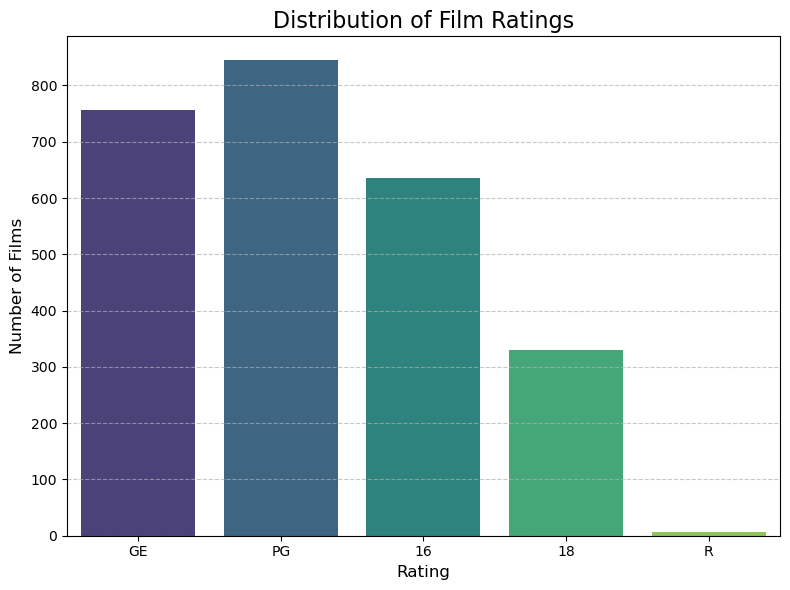


Rating Value Counts:
PG    845
GE    756
16    636
18    330
R       6
Name: rating, dtype: int64

Rating Percentage Distribution:
PG    32.84
GE    29.38
16    24.72
18    12.83
R      0.23
Name: rating, dtype: float64


In [19]:
print("\n--- 6.1.1 Distribution of Film Ratings ---")
# Define the rating order for consistent plotting
rating_order = ['GE', 'PG', '16', '18', 'R']

plt.figure(figsize=(8, 6))
sns.countplot(data=film_df, x='rating', order=rating_order, palette='viridis')
plt.title('Distribution of Film Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Films', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nRating Value Counts:")
print(film_df['rating'].value_counts())
print("\nRating Percentage Distribution:")
print(film_df['rating'].value_counts(normalize=True).mul(100).round(2))

#### Summary of Film Ratings Distribution
- Majority of content is classified as **GE** and **PG**
- Very few items fall under the **Restricted** category

#### Distribution of Genres


--- 6.1.2 Distribution of Genres ---


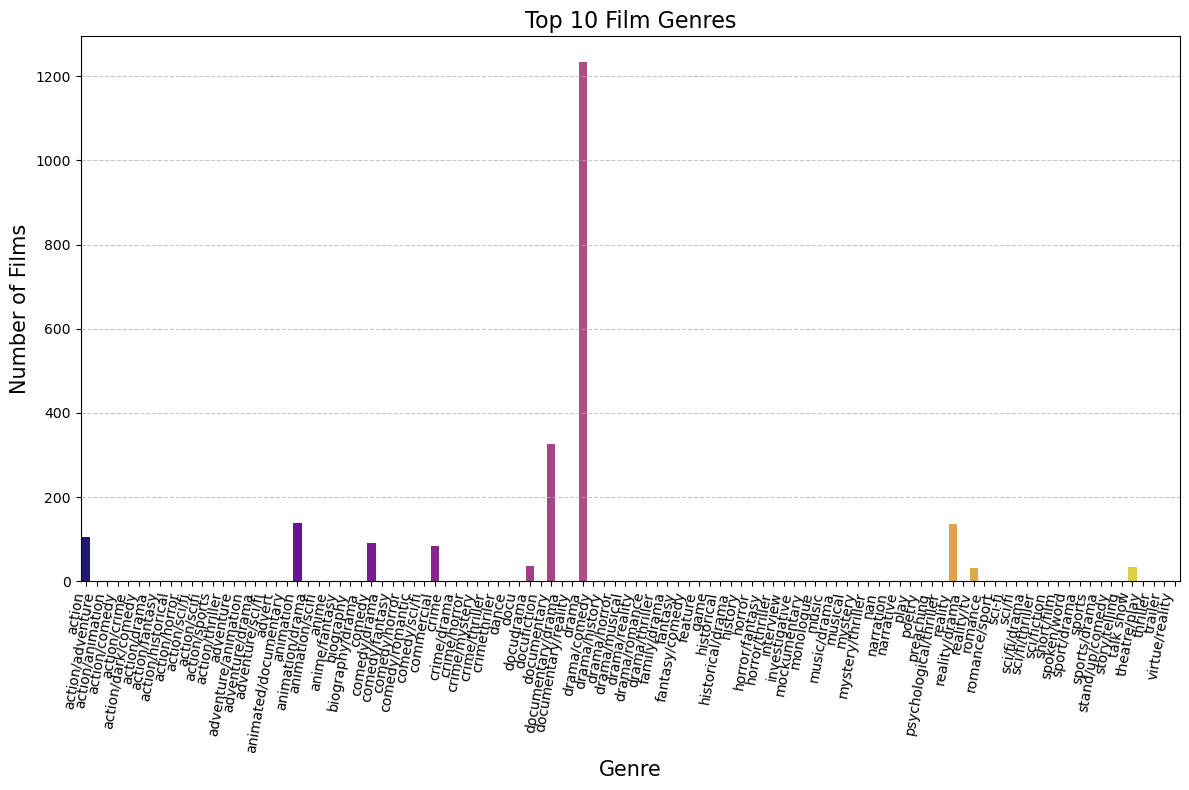


Genre Value Counts (Top 10):
drama          1233
documentary     325
animation       139
reality         136
action          106
comedy           90
commercial       84
docudrama        36
talk show        35
reality/tv       31
Name: genre, dtype: int64


In [20]:
print("\n--- 6.1.2 Distribution of Genres ---")
plt.figure(figsize=(12, 8))
# Get top N genres for better visualization, as there might be many unique genres
top_n_genres = film_df['genre'].value_counts().head(10) # Adjust N as needed to display a manageable number
sns.barplot(x=top_n_genres.index, y=top_n_genres.values, palette='plasma')
plt.title('Top 10 Film Genres', fontsize=16)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Number of Films', fontsize=15)
plt.xticks(rotation=80, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nGenre Value Counts (Top 10):")
print(top_n_genres)

#### Distribution of Country of Origin


--- 6.1.3 Distribution of Country of Origin ---


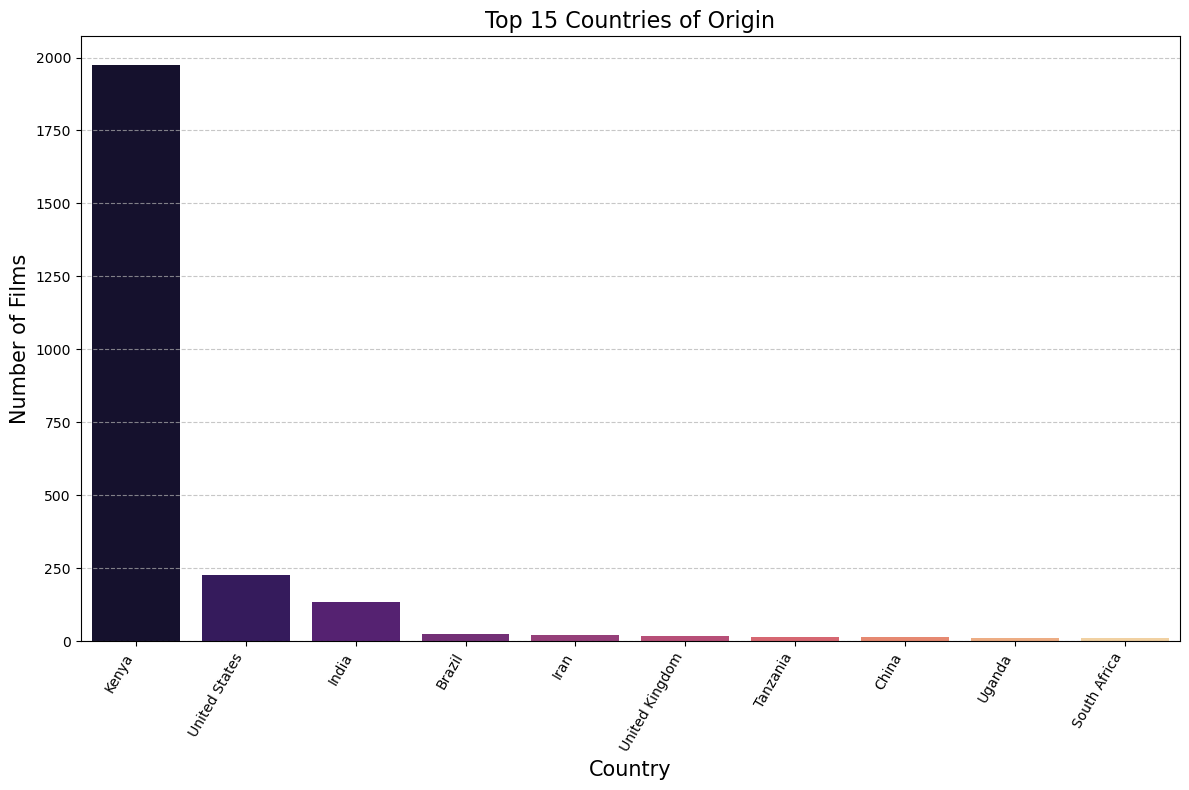


Country of Origin Value Counts (Top 10):
Kenya             1974
United States      228
India              134
Brazil              23
Iran                21
United Kingdom      19
Tanzania            15
China               15
Uganda              12
South Africa        12
Name: country_of_origin, dtype: int64


In [21]:
print("\n--- 6.1.3 Distribution of Country of Origin ---")
plt.figure(figsize=(12, 8))
# Get top N countries
top_n_countries = film_df['country_of_origin'].value_counts().head(10)
sns.barplot(x=top_n_countries.index, y=top_n_countries.values, palette='magma')
plt.title('Top 15 Countries of Origin', fontsize=16)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Number of Films', fontsize=15)
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nCountry of Origin Value Counts (Top 10):")
print(top_n_countries)

#### Distribution of Classification Year


--- 6.1.5 Distribution of Classification Year ---


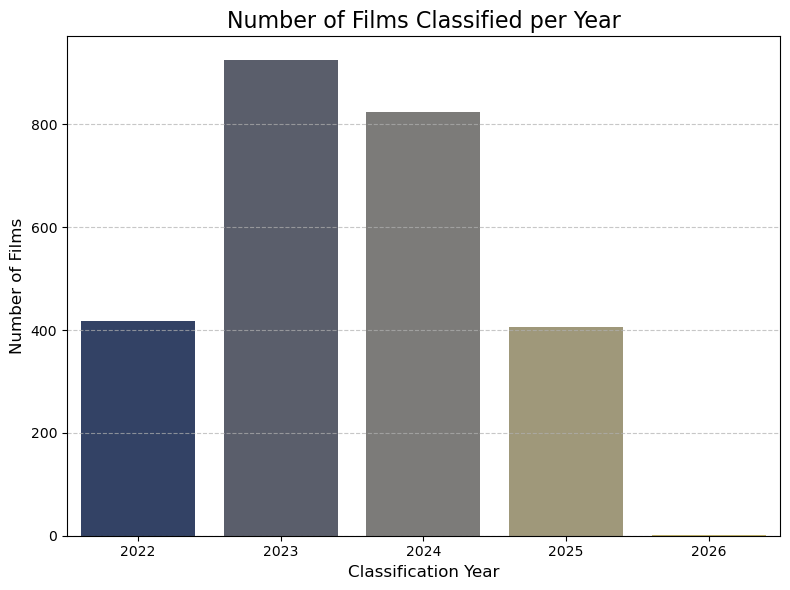


Classification Year Value Counts:
2022    418
2023    925
2024    824
2025    405
2026      1
Name: classification_year, dtype: int64


In [22]:
print("\n--- 6.1.5 Distribution of Classification Year ---")
plt.figure(figsize=(8, 6))
sns.countplot(data=film_df, x='classification_year', palette='cividis',
              order=sorted(film_df['classification_year'].unique()))
plt.title('Number of Films Classified per Year', fontsize=16)
plt.xlabel('Classification Year', fontsize=12)
plt.ylabel('Number of Films', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nClassification Year Value Counts:")
print(film_df['classification_year'].value_counts().sort_index())

### Bivariate Analysis
- Objective: Explore relationships between features and the target variable `rating`.

####  Rating vs. Top Genres


--- 6.2.2 Rating vs. Top Genres ---


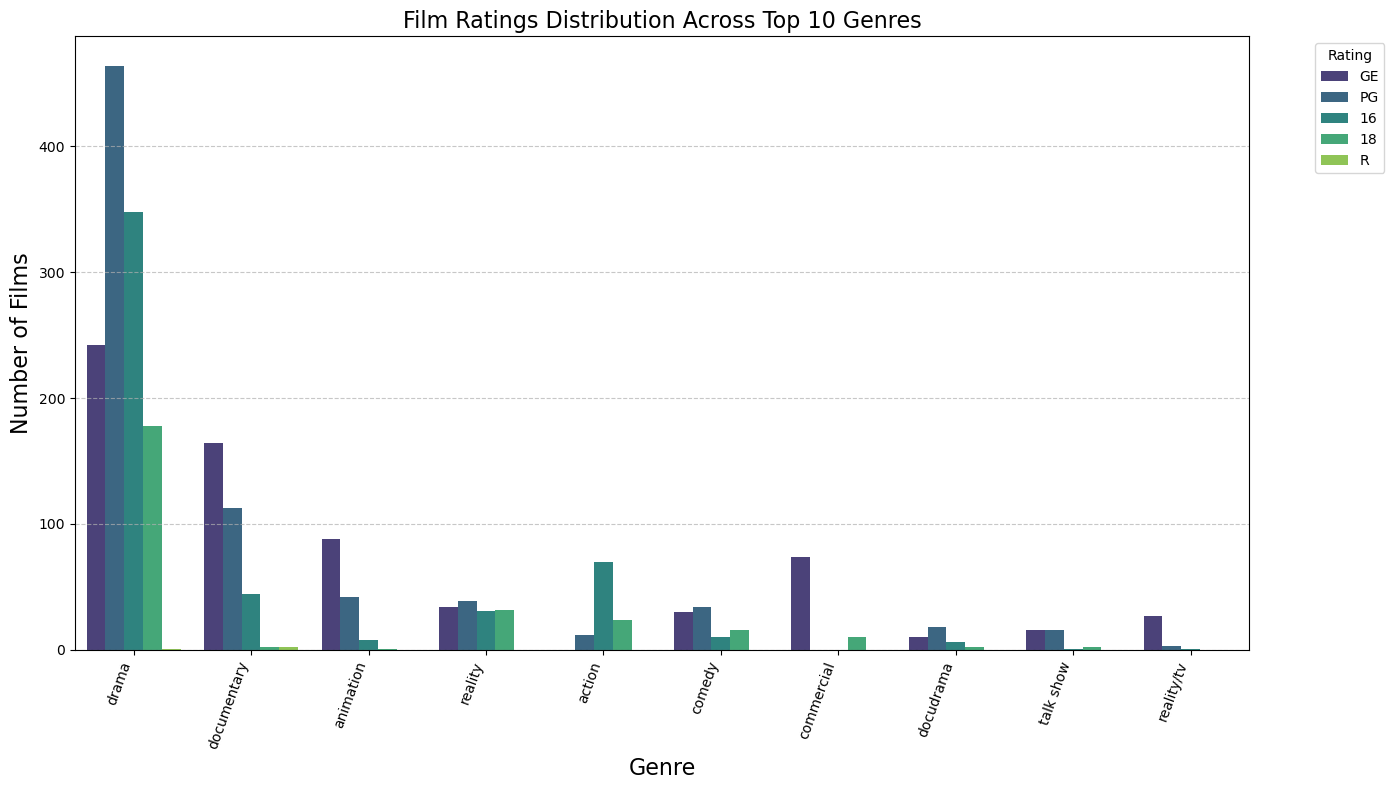

In [23]:
print("\n--- 6.2.2 Rating vs. Top Genres ---")
# Filter for the top N genres for a cleaner plot
top_genres_list = film_df['genre'].value_counts().head(10).index.tolist()
# Filter the DataFrame to only include rows with these top genres to simplify the plot by focusing on dominant categories.
df_top_genres_filtered = film_df[film_df['genre'].isin(top_genres_list)].copy()

plt.figure(figsize=(14, 8))
sns.countplot(data=df_top_genres_filtered, x='genre', hue='rating', order=top_genres_list,
              hue_order=rating_order, palette='viridis')
plt.title('Film Ratings Distribution Across Top 10 Genres', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Number of Films', fontsize=16)
plt.xticks(rotation=70, ha='right')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Summary of Film Ratings Distribution Across Top 10 Genres

* This grouped bar chart shows how film ratings (GE, PG, 16, 18, R) are distributed across the top 10 genres. It highlights which genres are more family-friendly and which tend to have restrictive ratings. For example, genres like horror or action may have more 18+ ratings, while animation and documentary often align with general audience categories. The chart offers a clear view of how age-appropriateness varies by genre.

**Insights**
* Drama dominates with a wide spread of ratings, especially PG and 16.

* Documentary and Animation are mostly family-friendly (GE, PG).

* Action leans toward more mature ratings (16, 18).

* Commercials are mostly rated GE.

* Other genres like Reality and Comedy have mixed but generally lighter ratings.

#### Rating vs. Country of Origin


--- 6.2.3 Rating vs. Country of Origin ---


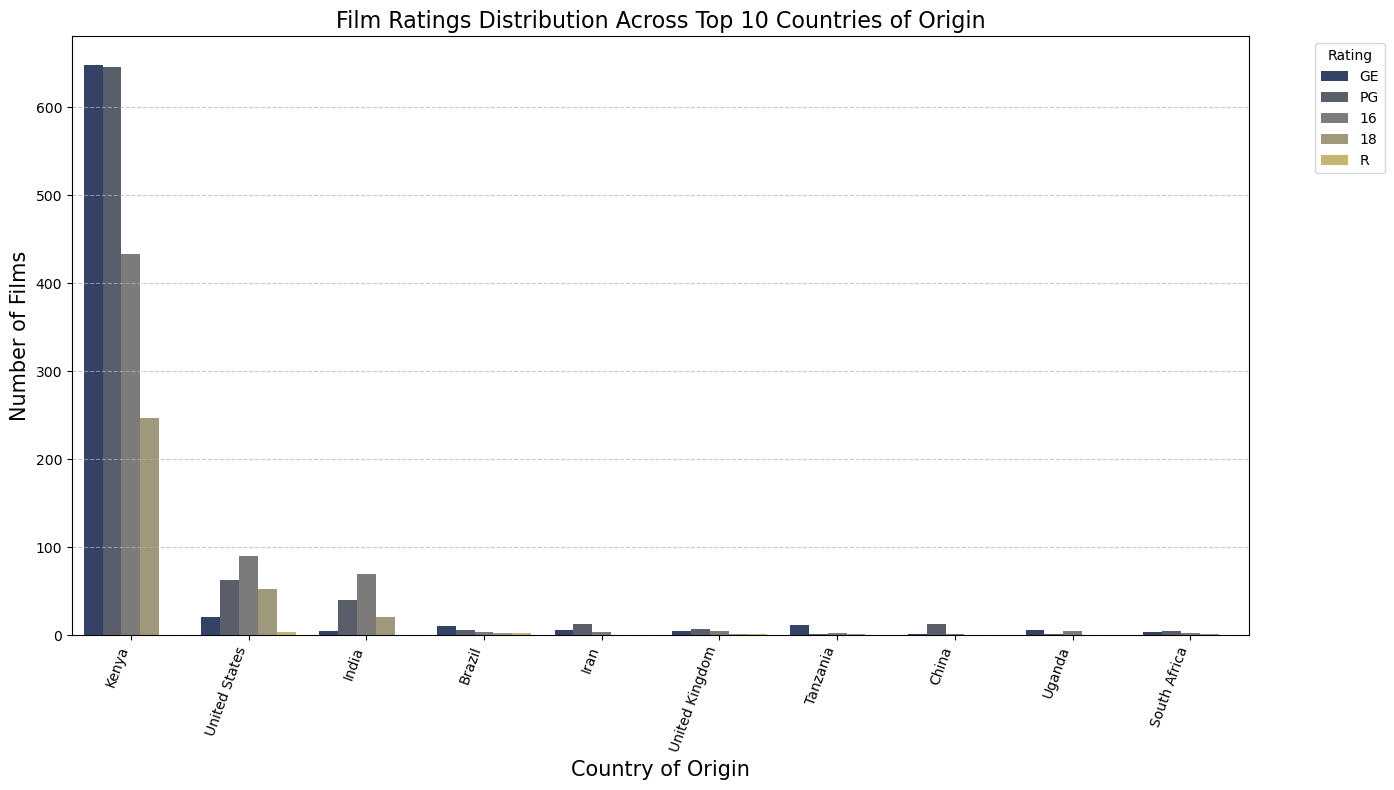

In [24]:
print("\n--- 6.2.3 Rating vs. Country of Origin ---")
# Considering top N countries to avoid cluttered plot
top_countries_list = film_df['country_of_origin'].value_counts().head(10).index.tolist()
df_top_countries_filtered = film_df[film_df['country_of_origin'].isin(top_countries_list)].copy()

plt.figure(figsize=(14, 8))
sns.countplot(data=df_top_countries_filtered, x='country_of_origin', hue='rating',
              order=top_countries_list, hue_order=rating_order, palette='cividis')
plt.title('Film Ratings Distribution Across Top 10 Countries of Origin', fontsize=16)
plt.xlabel('Country of Origin', fontsize=15)
plt.ylabel('Number of Films', fontsize=15)
plt.xticks(rotation=70, ha='right')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Summary of Film Ratings Distribution Across Top 10 Countries of Origin

This grouped bar chart compares film rating distributions across the top 10 countries of origin. Each country shows a breakdown of ratings (GE, PG, 16, 18, R), revealing patterns such as:

* Countries that produce more family friendly vs. restrictive content

* Cultural or regulatory differences in rating practices

* Regional tendencies in film classification (e.g., more R-rated films from some countries)

* The visualization helps identify how content standards and audience targeting vary internationally.

**Insights**

* The chart shows that Kenya leads in film production across all rating categories, especially in GE and PG, indicating family-friendly content. The United States has a more balanced distribution with more 16–R rated films, suggesting mature content. India leans heavily toward 16-rated films. Other countries like Brazil, Tanzania, and Uganda mostly produce general audience films. Overall, the chart highlights regional differences in content maturity and classification.

### Text Analysis `synopsis` and `justification`
- Objective: Gain insights from free-text fields by visualizing common words and identifying key themes. 
- For basic EDA, we focused on word frequency and visualization using word clouds. For more advanced modeling, we typically used TfidfVectorizer or CountVectorizer to convert text into numerical features.



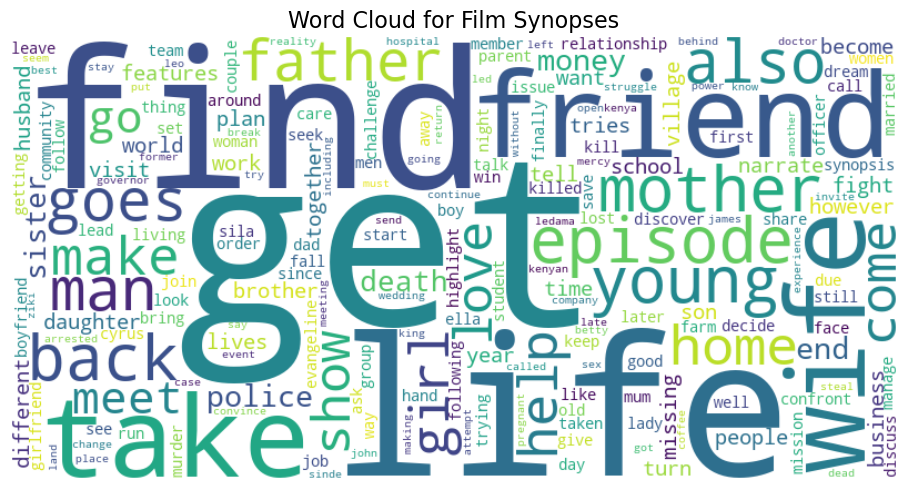

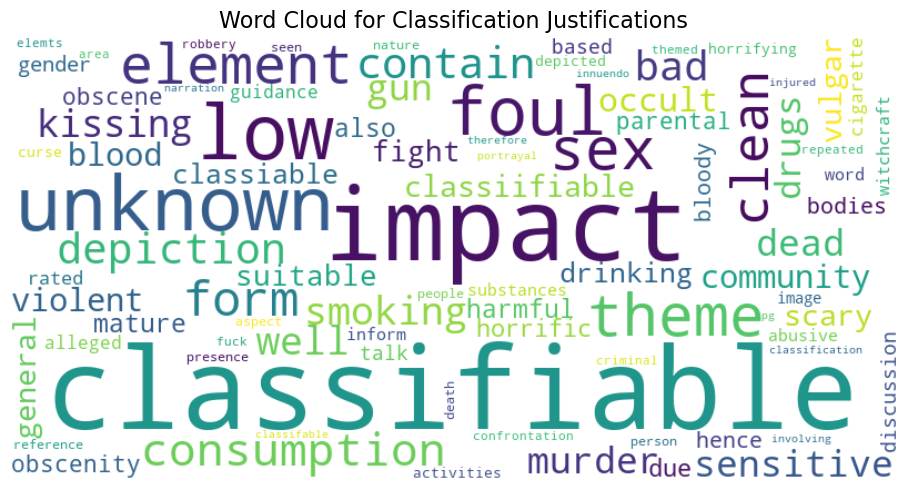

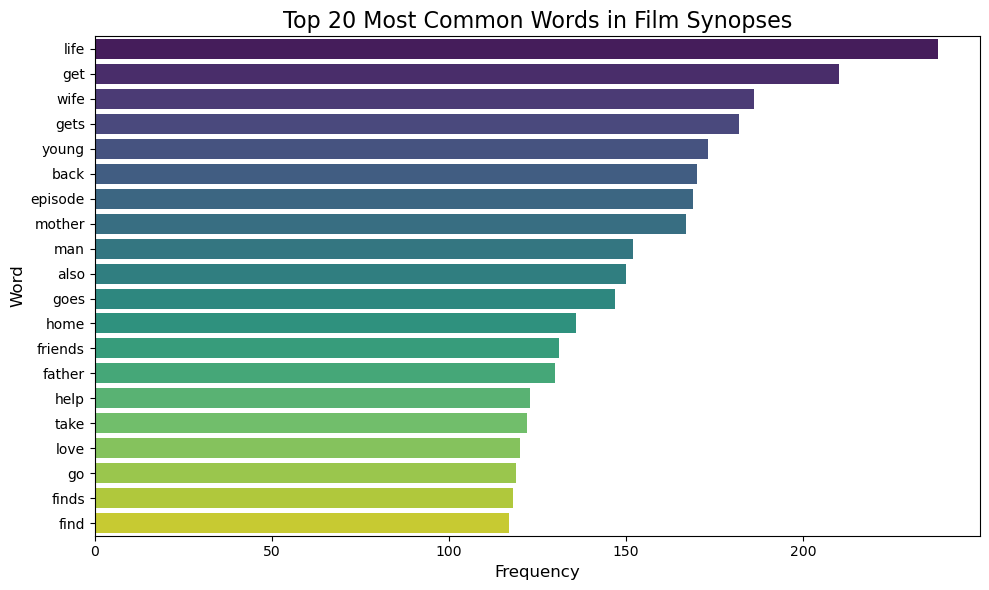

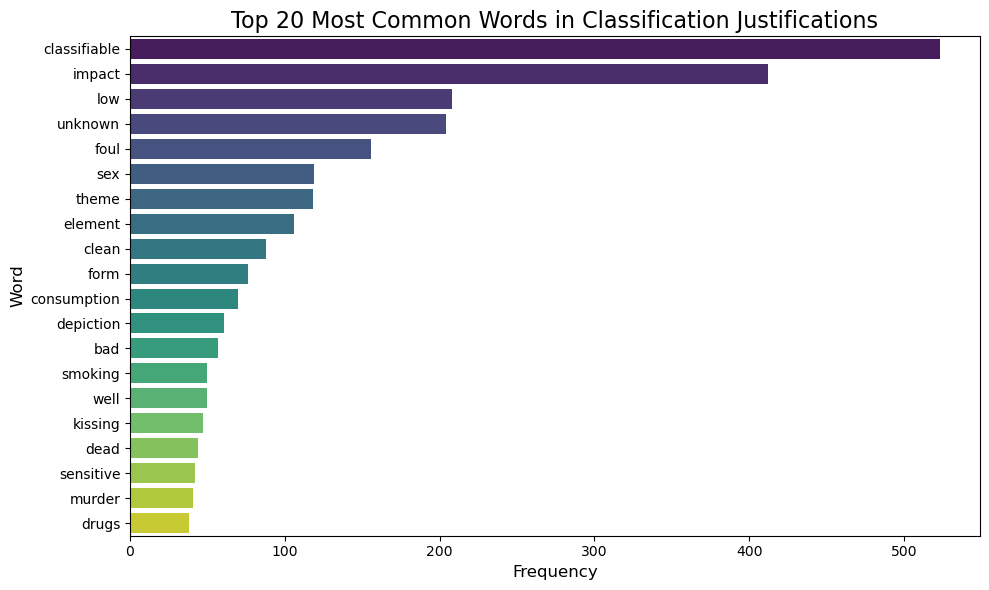

In [25]:
# Combine all synopsis text into a single string Excluding the placeholder 'No synopsis available' and 'missing synopsis' from text analysis
all_synopses = ' '.join(film_df[film_df['synopsis'] != 'No synopsis available']['synopsis'].astype(str).tolist())

# Combine all justification text into a single string Exclude the placeholder 'No justification given'
all_justifications = ' '.join(film_df[film_df['justification'] != 'No justification given']['justification'].astype(str).tolist())


# Define English stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['film', 'movie', 'story', 'character', 'new', 'one', 'two', 'three', 'etc',
                   'no synopsis available', 'no justification given', 'reasons', 'reason',
                   'scene', 'scenes', 'visual', 'language', 'children', 'adult', 'violence',
                   'sexual', 'content', 'implied', 'strong', 'suggestive', 'brief', 'sequences',
                   'drug', 'use', 'nudity', 'coarse', 'thematic', 'elements', 'some', 'mild', 'minor',
                   'depictions', 'brief', 'references', 'dialogue', 'material', 'moderate', 'intense',
                   'explicit', 'disturbing', 'images', 'action', 'fantasy', 'horror', 'peril',
                   'sexualised', 'abuse', 'depicts', 'references', 'discrimination', 'illegal', 'illicit',
                   'substance', 'terror', 'suicide', 'self', 'harm', 'gore', 'threat', 'bullying',
                   'discrimination', 'hate', 'speech', 'gang', 'gangs', 'gambling', 'animal',
                   'cruelty', 'abuse', 'graphic', 'disturbing', 'verbal', 'physical', 'violence',
                   'harassment', 'racism', 'racist', 'homophobia', 'sexism', 'sexist', 'religious',
                   'discrimination', 'religious', 'persecution', 'discrimination', 'bigotry',
                   'xenophobia', 'exploitation', 'trafficking', 'terrorism', 'war', 'torture',
                   'mutilation', 'cannibalism', 'infanticide', 'child', 'pornography', 'bestiality',
                   'necrophilia', 'incest', 'nonconsensual', 'sexual', 'acts', 'suicidal', 'ideation',
                   'self-mutilation', 'eating', 'disorders', 'self-destructive', 'behavior', 'incitement',
                   'hatred', 'propaganda', 'extreme', 'ideology', 'radicalization', 'terrorist', 'propaganda',
                   'recruitment', 'grooming', 'sexual', 'predation', 'sexual', 'harassment', 'sexual',
                   'assault', 'rape', 'sexual', 'violence', 'non-consensual', 'sexual', 'acts', 'explicit',
                   'sexual', 'intercourse', 'explicit', 'sexual', 'images', 'child', 'sexual', 'abuse',
                   'child', 'exploitation', 'child', 'sexual', 'violence', 'child', 'pornography',
                   'incestuous', 'sexual', 'acts', 'bestiality', 'necrophilia', 'cannibalism', 'snuff',
                   'films', 'torture', 'mutilation', 'dismemberment', 'decapitation', 'graphic', 'gore',
                   'extreme', 'violence', 'gratuitous', 'violence', 'sadism', 'masochism', 'human',
                   'sacrifice', 'animal', 'cruelty', 'animal', 'abuse', 'animal', 'torture', 'animal',
                   'fighting', 'illegal', 'drug', 'manufacture', 'illegal', 'drug', 'trafficking',
                   'illegal', 'drug', 'use', 'drug', 'addiction', 'alcohol', 'abuse', 'substance',
                   'abuse', 'gambling', 'addiction', 'self-harm', 'suicide', 'graphic', 'depictions',
                   'of', 'self-harm', 'suicide', 'graphic', 'suicide', 'methods', 'methods', 'glamorization',
                   'self-harm', 'suicide', 'bully', 'bullying', 'cyberbullying', 'stalking', 'harassment',
                   'threats', 'intimidation', 'extortion', 'blackmail', 'kidnapping', 'abduction',
                   'hostage', 'taking', 'trafficking', 'human', 'trafficking', 'child', 'trafficking',
                   'slavery', 'forced', 'labor', 'forced', 'marriage', 'female', 'genital', 'mutilation',
                   'fgm', 'honor', 'killings', 'domestic', 'violence', 'child', 'abuse', 'elder', 'abuse',
                   'animal', 'abuse', 'hate', 'crimes', 'terrorism', 'extremism', 'radicalization',
                   'incitement', 'hatred', 'propaganda', 'hate', 'speech', 'discrimination', 'racism',
                   'sexism', 'homophobia', 'transphobia', 'xenophobia', 'religious', 'discrimination',
                   'political', 'discrimination', 'disability', 'discrimination', 'ageism', 'body',
                   'shaming', 'fat', 'shaming', 'slut', 'shaming', 'victim', 'blaming', 'revenge',
                   'porn', 'doxing', 'swatting', 'fake', 'news', 'misinformation', 'disinformation',
                   'conspiracy', 'theories', 'propaganda', 'manipulation', 'psychological', 'manipulation',
                   'brainwashing', 'cults', 'mind', 'control', 'mkultra', 'torture', 'interrogation',
                   'extrajudicial', 'killing', 'genocide', 'ethnic', 'cleansing', 'war', 'crimes',
                   'crimes', 'against', 'humanity', 'human', 'rights', 'violations', 'political',
                   'repression', 'authoritarianism', 'dictatorship', 'tyranny', 'anarchy', 'social',
                   'chaos', 'societal', 'breakdown', 'apocalypse', 'dystopia', 'utopia', 'speculative',
                   'fiction', 'science', 'fiction', 'fantasy', 'mythology', 'folklore', 'fairytale',
                   'legend', 'myth', 'epic', 'saga', 'odyssey', 'journey', 'quest', 'adventure', 'thriller',
                   'mystery', 'suspense', 'crime', 'drama', 'comedy', 'romance', 'musical', 'western',
                   'documentary', 'biography', 'historical', 'period', 'piece', 'war', 'film', 'spy',
                   'film', 'action', 'animation', 'childrens', 'family', 'short', 'feature', 'length',
                   'documentary', 'tv', 'series', 'miniseries', 'web', 'series', 'short', 'film',
                   'feature', 'film', 'music', 'video', 'commercial', 'advertisement', 'promo',
                   'trailer', 'documentary', 'short', 'experimental', 'art', 'house', 'independent',
                   'foreign', 'language', 'cult', 'classic', 'b-movie', 'splatter', 'film', 'gore',
                   'fest', 'slasher', 'film', 'zombie', 'apocalypse', 'vampire', 'werewolf', 'monster',
                   'creature', 'alien', 'invasion', 'superhero', 'comic', 'book', 'adaptation',
                   'video', 'game', 'adaptation', 'true', 'crime', 'docudrama', 'mockumentary',
                   'found', 'footage', 'anthology', 'film', 'segment', 'omnibus', 'film', 'collection',
                   'compilation', 'remake', 'reboot', 'sequel', 'prequel', 'spin-off', 'crossover',
                   'parody', 'spoof', 'satire', 'black', 'comedy', 'dark', 'comedy', 'romantic',
                   'comedy', 'screwball', 'comedy', 'slapstick', 'comedy', 'musical', 'comedy',
                   'action', 'comedy', 'horror', 'comedy', 'science', 'fiction', 'comedy', 'western',
                   'comedy', 'drama', 'comedy', 'dramedy', 'tragicomedy', 'melodrama', 'family',
                   'drama', 'teen', 'drama', 'legal', 'drama', 'medical', 'drama', 'political',
                   'drama', 'social', 'drama', 'historical', 'drama', 'war', 'drama', 'biographical',
                   'drama', 'sports', 'drama', 'road', 'movie', 'coming', 'of', 'age', 'erotic',
                   'thriller', 'psychological', 'thriller', 'crime', 'thriller', 'action', 'thriller',
                   'mystery', 'thriller', 'supernatural', 'thriller', 'horror', 'thriller', 'spy',
                   'thriller', 'political', 'thriller', 'legal', 'thriller', 'medical', 'thriller',
                   'techno', 'thriller', 'eco', 'thriller', 'disaster', 'film', 'survival', 'film',
                   'prison', 'film', 'heist', 'film', 'gangster', 'film', 'mafia', 'film', 'martial',
                   'arts', 'film', 'western', 'sci-fi', 'fantasy', 'horror', 'animation', 'adventure',
                   'family', 'documentary', 'history', 'music', 'sport', 'short', 'news', 'reality-tv',
                   'talk-show', 'game-show', 'adult', 'erotica', 'porn', 'experimental', 'independent',
                   'cult', 'classic', 'art', 'house', 'foreign', 'foreign-language', 'silent', 'film',
                   'black', 'white', 'color', '3d', 'imax', 'vfx', 'cgi', 'motion', 'capture',
                   'stop', 'motion', 'hand-drawn', 'animation', 'computer', 'animation', 'live',
                   'action', 'live-action', 'animated', 'hybrid', 'live', 'action', 'documentary',
                   'docu-drama', 'mockumentary', 'found', 'footage', 'anthology', 'segment', 'omnibus',
                   'collection', 'compilation', 'remake', 'reboot', 'sequel', 'prequel', 'spin-off',
                   'crossover', 'parody', 'spoof', 'satire', 'black', 'comedy', 'dark', 'comedy',
                   'romantic', 'comedy', 'screwball', 'comedy', 'slapstick', 'comedy', 'musical',
                   'comedy', 'action', 'comedy', 'horror', 'comedy', 'science', 'fiction', 'comedy',
                   'western', 'comedy', 'drama', 'comedy', 'dramedy', 'tragicomedy', 'melodrama',
                   'family', 'drama', 'teen', 'drama', 'legal', 'drama', 'medical', 'drama',
                   'political', 'drama', 'social', 'drama', 'historical', 'drama', 'war', 'drama',
                   'biographical', 'drama', 'sports', 'drama', 'road', 'movie', 'coming', 'of', 'age',
                   'erotic', 'thriller', 'psychological', 'thriller', 'crime', 'thriller', 'action',
                   'thriller', 'mystery', 'thriller', 'supernatural', 'thriller', 'horror', 'thriller',
                   'spy', 'thriller', 'political', 'thriller', 'legal', 'thriller', 'medical', 'thriller',
                   'techno', 'thriller', 'eco', 'thriller', 'disaster', 'film', 'survival', 'film',
                   'prison', 'film', 'heist', 'film', 'gangster', 'film', 'mafia', 'film', 'martial',
                   'arts', 'film', 'western', 'sci-fi', 'fantasy', 'horror', 'animation', 'adventure',
                   'family', 'documentary', 'history', 'music', 'sport', 'short', 'news', 'reality-tv',
                   'talk-show', 'game-show', 'adult', 'erotica', 'porn', 'experimental', 'independent',
                   'cult', 'classic', 'art', 'house', 'foreign', 'foreign-language', 'silent', 'film',
                   'black', 'white', 'color', '3d', 'imax', 'vfx', 'cgi', 'motion', 'capture',
                   'stop', 'motion', 'hand-drawn', 'animation', 'computer', 'animation', 'live',
                   'action', 'live-action', 'animated', 'hybrid', 'live', 'action', 'documentary',
                   'docu-drama', 'mockumentary', 'found', 'footage', 'anthology', 'segment', 'omnibus',
                   'collection', 'compilation', 'remake', 'reboot', 'sequel', 'prequel', 'spin-off',
                   'crossover', 'parody', 'spoof', 'satire', 'black', 'comedy', 'dark', 'comedy',
                   'romantic', 'comedy', 'screwball', 'comedy', 'slapstick', 'comedy', 'musical',
                   'comedy', 'action', 'comedy', 'horror', 'comedy', 'science', 'fiction', 'comedy',
                   'western', 'comedy', 'drama', 'comedy', 'dramedy', 'tragicomedy', 'melodrama',
                   'family', 'drama', 'teen', 'drama', 'legal', 'drama', 'medical', 'drama',
                   'political', 'drama', 'social', 'drama', 'historical', 'drama', 'war', 'drama',
                   'biographical', 'drama', 'sports', 'drama', 'road', 'movie', 'coming', 'of', 'age',
                   'erotic', 'thriller', 'psychological', 'thriller', 'crime', 'thriller', 'action',
                   'thriller', 'mystery', 'thriller', 'supernatural', 'thriller', 'horror', 'thriller',
                   'spy', 'thriller', 'political', 'thriller', 'legal', 'thriller', 'medical', 'thriller',
                   'techno', 'thriller', 'eco', 'thriller', 'disaster', 'film', 'survival', 'film',
                   'prison', 'film', 'heist', 'film', 'gangster', 'film', 'mafia', 'film', 'martial',
                   'arts', 'film', 'western']) 

def generate_wordcloud(text, title):
    if not text.strip():
        print(f"Skipping Word Cloud for '{title}': No significant text available.")
        return

    words = text.lower().split()
    # Filter out stopwords, non-alphabetic words, and short words  length < 2
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 1]

    if not filtered_words:
        print(f"Skipping Word Cloud for '{title}': No significant words remaining after filtering.")
        return

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stop_words, min_font_size=10, collocations=False).generate(' '.join(filtered_words)) # collocations=False to avoid displaying bigrams

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate Word Clouds
generate_wordcloud(all_synopses, 'Word Cloud for Film Synopses')
generate_wordcloud(all_justifications, 'Word Cloud for Classification Justifications')

# Display most common words
def plot_common_words(text, title, n=20):
    if not text.strip():
        print(f"Skipping Common Words plot for '{title}': No significant text available.")
        return

    words = text.lower().split()
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 1]

    if not filtered_words:
        print(f"Skipping Common Words plot for '{title}': No significant words remaining after filtering.")
        return

    common_words = Counter(filtered_words).most_common(n)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Top {n} Most Common Words in {title}', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot Most Common Words
plot_common_words(all_synopses, 'Film Synopses')
plot_common_words(all_justifications, 'Classification Justifications')

**Justifications**

These bar charts highlight the key language patterns in film descriptions and rating explanations:

* Film Synopses emphasize recurring themes, actions, and characters—revealing common narrative trends.

* Classification Justifications spotlight frequent concerns like violence, language, or sexual content—indicating what regulators focus on when assigning ratings.

Together, they contrast creative storytelling with regulatory reasoning.

#### Exploring Length of Synopsis

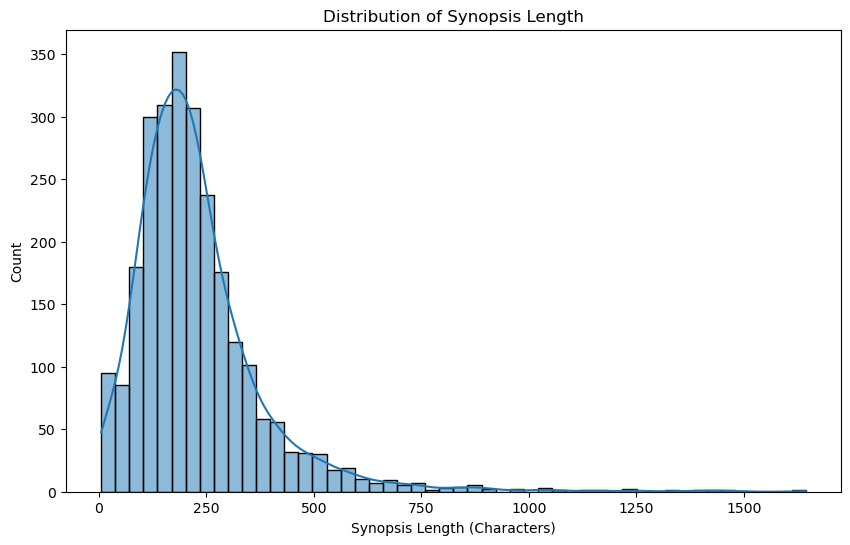

In [26]:
# Requires non-NaN synopses first
film_df['synopsis_length'] = film_df['synopsis'].fillna('').apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(film_df['synopsis_length'], bins=50, kde=True)
plt.title('Distribution of Synopsis Length')
plt.xlabel('Synopsis Length (Characters)')
plt.ylabel('Count')
plt.show()
film_df.drop(columns=['synopsis_length'], inplace=True) # Drop temporary column

# Summary of Synopsis Length Distribution
**Justifications**

The synopsis length distribution shows how detailed film descriptions typically are:

* Most synopses fall within a moderate length range.

* There's noticeable skewness, with some very short or very long entries.

* Short synopses may lack detail, while long ones could indicate data inconsistencies.

This insight helps tailor text analysis methods by revealing the need to handle varying text lengths appropriately.

# Key Insights from Exploratory Data Analysis

**1. Data Distribution & Quality:**
* The dataset contains films with various features after thorough cleaning and standardization.
* The target variable, `rating`, shows an uneven distribution with certain ratings appearing more frequently than others, which may require attention during modeling.
* Missing values have been systematically addressed through appropriate imputation strategies for each data type.
* Numerical features like `duration_mins` show a right-skewed distribution with most films falling in the standard 90-120 minute range, though outliers exist.

**2. Relationships with Film Rating:**
* **Duration:** There appears to be some relationship between film duration and rating, with more restrictive ratings (16, 18, R) generally associated with longer films, while GE-rated content tends to be shorter on average.
* **Genres:** Clear patterns emerge with certain genres strongly associated with specific ratings. Family-friendly genres like animation dominate GE ratings, while action, thriller, and horror content is more prevalent in 16 and 18 ratings.
* **Country of Origin:** Films from certain countries show distinct rating patterns, suggesting different content standards or filmmaking traditions across regions.
* **Classification Year:** The data shows evolving trends in rating distributions over time, potentially reflecting changing content standards or shifts in the types of films being classified.

**3. Textual Insights (`synopsis` and `justification`):**
* **Synopsis:** Word frequency analysis reveals common narrative themes across the dataset, with certain terms potentially serving as indicators for specific rating categories.
* **Justification:** The most common terms in classification justifications highlight the primary concerns of ratings boards, with language related to violence, sexual content, and mature themes appearing frequently.
* **Synopsis Length:** The distribution of synopsis lengths shows considerable variation, indicating inconsistent detail levels in film descriptions that may affect text-based analyses.

**4. Potential Challenges & Next Steps for Modeling:**
* **Imbalance:** The uneven distribution of ratings will require techniques like stratified sampling or class weighting to ensure model fairness.
* **Categorical Features:** The numerous categorical variables (genre, country of origin) will need appropriate encoding strategies that preserve their relationship with the target variable.
* **Text Features:** The rich textual data in synopses and justifications presents an opportunity for NLP techniques to extract predictive features.
* **Feature Engineering Opportunities:**
    * Creating derived features from existing data, such as genre counts, content flags from justification text, or temporal features from classification dates.
    * Developing text-based features that capture thematic elements predictive of ratings.
* **Model Selection:** Given the mixed data types and potential non-linear relationships, ensemble methods like Random Forest or Gradient Boosting would be appropriate, with a simpler model like Logistic Regression serving as a baseline.

# Feature Engineering
- Objective: Transforming raw data into features that can be effectively utilized by machine learning models. We will extract temporal features from convert text into numerical representations, and encode categorical variables.

### Text Features Preparation (NLP)
We will perform basic text preprocessing before applying TF-IDF (Term Frequency-Inverse Document Frequency) to the `synopsis` and `justification` columns. TF-IDF reflects how important a word is to a document in a collection or corpus.
- min_df ignores terms that have a document frequency lower than the given threshold.
- max_df ignores terms that have a document frequency higher than the given threshold.
- ngram_range enables the creation of multi-word phrases.

#### Text Preprocessing

In [27]:
# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# --- Custom Stop Words ---
stop_words.update([
    'film', 'movie', 'story', 'character', 'new', 'one', 'two', 'three', 'etc',
    'no synopsis available', 'no justification given', 'missing synopsis', 'unknown',
    'justification', 'reason', 'reasons',
    'scene', 'scenes', 'visual', 'language', 'content', 'implied', 'strong',
    'suggestive', 'brief', 'sequences', 'thematic', 'elements', 'some', 'mild',
    'minor', 'depictions', 'references', 'dialogue', 'material', 'moderate',
    'explicit', 'disturbing', 'images', 'action', 'fantasy', 'horror', 'peril',
    'sexual', 'violence', 'drug', 'abuse', 'children', 'adult', 'words', 'word',
    'rated', 'rating',
    # Add any other specific terms that are noisy for analysis
])

# Function to preprocess text
def preprocess_text(text):
    text = str(text).lower()  # Convert to string and lowercase
    # Replace punctuation with a space, not an empty string
    text = re.sub(f'[{re.escape(string.punctuation)}]', ' ', text)
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = text.split()
    # Lemmatize and remove stop words, remove single char
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return ' '.join(tokens)

# --- Apply Preprocessing ---
print("Applying text preprocessing to 'synopsis' and 'justification'...")

if 'synopsis' in film_df.columns:
    film_df['synopsis_processed'] = film_df['synopsis'].apply(preprocess_text)
else:
    print("'synopsis' column not found for processing. Skipping.")
    film_df['synopsis_processed'] = "" # Fallback if column is missing

if 'justification' in film_df.columns:
    film_df['justification_processed'] = film_df['justification'].apply(preprocess_text)
else:
    print("'justification' column not found for processing. Skipping.")
    film_df['justification_processed'] = "" # Fallback if column is missing

# Checking to confirm preprocessing
if not film_df.empty:
    print("\nOriginal Synopsis example:", film_df['synopsis'].iloc[0] if 'synopsis' in film_df.columns else "N/A")
    print("Processed Synopsis example:", film_df['synopsis_processed'].iloc[0])
    print("\nOriginal Justification example:", film_df['justification'].iloc[0] if 'justification' in film_df.columns else "N/A")
    print("Processed Justification example:", film_df['justification_processed'].iloc[0])

Applying text preprocessing to 'synopsis' and 'justification'...

Original Synopsis example: Rashtra Karachi OM is an action Indian film depicting Rishi as an OM opara commando in a top secret mission for his nation.He goes to work with his top notch combat skills and realised that his personal and professional life is intertwined with multiple layers of betrayal and deceit.
Processed Synopsis example: rashtra karachi om indian depicting rishi om opara commando top secret mission nation go work top notch combat skill realised personal professional life intertwined multiple layer betrayal deceit

Original Justification example: Pain inflicting violence scenes,cold blood murder fights and combat with few torture scenes. Alcohol drinking and smoking scenes,mild scary scenes of torture and combat fights.
Processed Justification example: pain inflicting cold blood murder fight combat torture alcohol drinking smoking scary torture combat fight


### TF-IDF Vectorizers for `synopsis`, `justification`, and `film_title`

In [28]:
# Initialize TF-IDF Vectorizers for 'synopsis' and 'justification'
# min_df and max_df are crucial for reducing dimensionality and noise
tfidf_synopsis = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.8, ngram_range=(1, 2))
tfidf_justification = TfidfVectorizer(max_features=3000, min_df=5, max_df=0.8, ngram_range=(1, 2))

# *** All references to tfidf_title are removed ***

# Fit and transform 'synopsis_processed'
if 'synopsis_processed' in film_df.columns and not film_df['synopsis_processed'].empty:
    synopsis_features = tfidf_synopsis.fit_transform(film_df['synopsis_processed'])
    synopsis_feature_names = tfidf_synopsis.get_feature_names_out()
    df_synopsis_features = pd.DataFrame(synopsis_features.toarray(),
                                        columns=['synopsis_tfidf_' + col for col in synopsis_feature_names],
                                        index=film_df.index)
    print(f"\nShape of synopsis TF-IDF features: {df_synopsis_features.shape}")
else:
    df_synopsis_features = pd.DataFrame(index=film_df.index) # Empty DataFrame to concat later
    print("\nSkipping synopsis TF-IDF: 'synopsis_processed' column is empty or not found.")


# Fit and transform 'justification_processed'
if 'justification_processed' in film_df.columns and not film_df['justification_processed'].empty:
    justification_features = tfidf_justification.fit_transform(film_df['justification_processed'])
    justification_feature_names = tfidf_justification.get_feature_names_out()
    df_justification_features = pd.DataFrame(justification_features.toarray(),
                                             columns=['justification_tfidf_' + col for col in justification_feature_names],
                                             index=film_df.index)
    print(f"Shape of justification TF-IDF features: {df_justification_features.shape}")
else:
    df_justification_features = pd.DataFrame(index=film_df.index) # Empty DataFrame
    print("Skipping justification TF-IDF: 'justification_processed' column is empty or not found.")


# Initialize df_title_features as an empty DataFrame explicitly
# as 'film_title' and its processed version are no longer relevant for TF-IDF.
df_title_features = pd.DataFrame(index=film_df.index)
print("Skipping title TF-IDF: 'film_title' column and its processing were explicitly removed as requested.")


# Concatenate the new TF-IDF features with the main DataFrame
# Only include dataframes that were actually created (i.e., not empty by design)
dataframes_to_concat = [film_df]
if not df_synopsis_features.empty:
    dataframes_to_concat.append(df_synopsis_features)
if not df_justification_features.empty:
    dataframes_to_concat.append(df_justification_features)
# df_title_features will always be empty here, so it won't add any columns
# unless you intend to concatenate an empty df, which is harmless but not strictly necessary for columns.

film_df = pd.concat(dataframes_to_concat, axis=1)
print("\nCombined DataFrame info after adding TF-IDF features:")
film_df.info(verbose=False, show_counts=True)

# Drop the original and processed text columns
# 'film_title' and 'title_processed' are definitively removed from this list as well.
text_cols_to_drop = ['synopsis', 'justification', 'synopsis_processed', 'justification_processed']
film_df.drop(columns=[col for col in text_cols_to_drop if col in film_df.columns], inplace=True, errors='ignore')

# Previewing after dropping
print("\nShape of DataFrame after adding TF-IDF features and dropping original text columns:", film_df.shape)
print("Example TF-IDF features (first 5 rows and first 5 TF-IDF columns):")
print(film_df.filter(like='_tfidf_').iloc[:, :5].head())



Shape of synopsis TF-IDF features: (2573, 2320)
Shape of justification TF-IDF features: (2573, 303)
Skipping title TF-IDF: 'film_title' column and its processing were explicitly removed as requested.

Combined DataFrame info after adding TF-IDF features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Columns: 2672 entries, genre to justification_tfidf_woman
dtypes: category(2), float64(2624), int32(38), int64(3), object(5)
memory usage: 52.1+ MB

Shape of DataFrame after adding TF-IDF features and dropping original text columns: (2573, 2668)
Example TF-IDF features (first 5 rows and first 5 TF-IDF columns):
   synopsis_tfidf_abandoned  synopsis_tfidf_abducted  synopsis_tfidf_able  synopsis_tfidf_abroad  synopsis_tfidf_abused
0                       0.0                      0.0                  0.0                    0.0                    0.0
1                       0.0                      0.0                  0.0                    0.0                    0

### Categorical Encoding
- We will apply One-Hot Encoding to nominal categorical columns such as `genre`, `country_of_origin`,`consumer_advisory_index`. This process will converts categorical variables into a numerical format that machine learning algorithms can understand, preventing them from assuming any ordinal relationship between categories.

In [29]:
print("\n--- Starting Categorical Encoding ---")

# Identify categorical columns for One-Hot Encoding
initial_categorical_cols = ['genre', 'country_of_origin', 'consumer_advisory_index']

# Filter columns that actually exist in the DataFrame
categorical_cols_to_encode = [col for col in initial_categorical_cols if col in film_df.columns]

# Visualize the columns that WILL be encoded
print(f"Categorical columns identified for encoding: {categorical_cols_to_encode}")

# Ensuring all columns are of string type before encoding to prevent errors with mixed types
for col in categorical_cols_to_encode:
    film_df[col] = film_df[col].astype(str)

# printing unique values if the column actually exists and is selected for encoding
if 'consumer_advisory_index' in categorical_cols_to_encode:
    print(f"Unique values in 'consumer_advisory_index' before encoding: {film_df['consumer_advisory_index'].unique()}")
else:
    print("'consumer_advisory_index' not found in DataFrame or not selected for encoding. Skipping unique value print.")


# Check if there are any columns left to encode
if not categorical_cols_to_encode:
    print("No categorical columns found to encode. Skipping One-Hot Encoding.")
else:
    # Initialize OneHotEncoder handle_unknown='ignore'prevents error on unseen categories
    encoder = OneHotEncoder(handle_unknown='ignore')
    print("OneHotEncoder initialized.")

    # Fit and Transform the categorical columns in one step
    encoded_features = encoder.fit_transform(film_df[categorical_cols_to_encode])
    print("OneHotEncoder fitted and transformed.")

    # Converting sparse matrix to a dense numpy array
    encoded_features = encoded_features.toarray()

    # Display shape
    print(f"Shape of encoded features (numpy array): {encoded_features.shape}")

    # Get Feature Names
    encoded_feature_names = encoder.get_feature_names_out(categorical_cols_to_encode)
    print(f"Number of encoded feature names: {len(encoded_feature_names)}")

    # Create a DataFrame from the encoded features
    df_encoded_features = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=film_df.index)
    print(f"Shape of encoded features DataFrame: {df_encoded_features.shape}")

    # Concatenate the new encoded features with the main DataFrame
    film_df = pd.concat([film_df, df_encoded_features], axis=1)
    print("\nDataFrame info after One-Hot Encoding:")
    film_df.info(verbose=False, show_counts=True) # Use verbose=False for many columns

    # Drop the original categorical columns
    film_df.drop(columns=categorical_cols_to_encode, inplace=True)

    print("\nShape of DataFrame after One-Hot Encoding and dropping original categorical columns:", film_df.shape)
    print("Example One-Hot Encoded features (first 5 rows, few selected columns):")
    # Filter to show a few representative encoded columns
    try:
        print(film_df.filter(like='genre_').iloc[:, :5].head())
    except IndexError:
        print("No 'genre_' columns to display (might have less than 5 unique genres).")
    try:
        print(film_df.filter(like='country_of_origin_').iloc[:, :5].head())
    except IndexError:
        print("No 'country_of_origin_' columns to display (might have less than 5 unique countries).")
    try:
        print(film_df.filter(like='consumer_advisory_index_').iloc[:, :5].head())
    except IndexError:
        print("No 'consumer_advisory_index_' columns to display (might have less than 5 unique consumer advisories).")

    # Final check of the DataFrame structure
#print("\nFinal Film DataFrame head after all feature engineering:")
#print(film_df.head())


--- Starting Categorical Encoding ---
Categorical columns identified for encoding: ['genre', 'country_of_origin']
'consumer_advisory_index' not found in DataFrame or not selected for encoding. Skipping unique value print.
OneHotEncoder initialized.
OneHotEncoder fitted and transformed.
Shape of encoded features (numpy array): (2573, 174)
Number of encoded feature names: 174
Shape of encoded features DataFrame: (2573, 174)

DataFrame info after One-Hot Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Columns: 2842 entries, genre to country_of_origin_Zambia
dtypes: category(1), float64(2798), int32(38), int64(3), object(2)
memory usage: 55.4+ MB

Shape of DataFrame after One-Hot Encoding and dropping original categorical columns: (2573, 2840)
Example One-Hot Encoded features (first 5 rows, few selected columns):
   genre_action  genre_action/adventure  genre_action/animation  genre_action/comedy  genre_action/crime
0           1.0                     0

### **Justification for Feature Engineering Choices:**

 * **Date Features:** Extracting `year`, `month`, and `day_of_week` from `date_classified` is crucial because content classification trends can vary seasonally (e.g., more family films around holidays) or over time (e.g., stricter ratings over years). These numeric features allow models to capture such temporal patterns. Dropping the original `date_classified` column after extraction avoids redundancy and ensures only numerical representations are used.
 * **TF-IDF for Text Features (`synopsis`, `justification`):**
 * **TF-IDF** is a robust technique for converting text into meaningful numerical vectors. It assigns higher values to words that are frequent in a document but rare across the entire corpus, effectively highlighting important keywords unique to each film's description.
 * `max_features`: Limits the number of features to the most impactful words/ngrams, preventing an overly sparse and high-dimensional dataset.
 * `min_df` and `max_df`: Filter out extremely rare words (potential typos, noise) and extremely common words (stop words like "the", "a", "is" that carry little meaning), improving feature relevance.
 * `ngram_range`: Allows the model to consider not just single words but also common two-word phrases (bigrams), which often carry more semantic context (e.g., "science fiction" is more meaningful than "science" and "fiction" separately).
 * After transformation, the original text columns are dropped to avoid directly using text data in the model and prevent multicollinearity with the newly created TF-IDF features.
* **One-Hot Encoding for Categorical Features (`genre`, `country_of_origin`, `platform`, `client`, `consumer_advisory_index`):**
 * **One-Hot Encoding** is the standard method for nominal (unordered) categorical variables. It converts each category into a new binary column (0 or 1), preventing machine learning algorithms from assuming an arbitrary ordinal relationship between categories. For example, if 'Comedy' was encoded as 1 and 'Action' as 2, a model might incorrectly infer that 'Action' is "greater than" 'Comedy'. One-Hot Encoding avoids this.
 * `handle_unknown='ignore'` is important for robustness in production, ensuring that if a new category appears in unseen data (e.g., a new country), the encoder doesn't throw an error but simply represents it as all zeros, preventing model crashes.
 * The original categorical columns are dropped after encoding to remove redundant information and ensure all model inputs are numerical.

Now, with feature engineering complete, the DataFrame is ready for the next step: **Model Selection and Training**.

# Modelling

Now that our data has been thoroughly cleaned and transformed into suitable features, we are ready to build and train our machine learning models. This phase involves:
1.  **Splitting the Data:** Dividing the dataset into training and testing sets to evaluate the model's performance on unseen data.
2.  **Using Pipelines:** Streamlining the workflow by combining preprocessing steps (like scaling) with the estimator.
3.  **Hyperparameter Tuning with GridSearchCV:** Systematically searching for the best hyperparameters for each model to optimize performance.
4.  **Model Selection & Training:** Implementing and training various classification algorithms, including traditional ML models and a simple Deep Learning (Multi-Layer Perceptron) model.
5.  **Model Evaluation:** Assessing each model's performance using relevant metrics for multi-class classification: accuracy, F1-score, precision, recall, and a confusion matrix.
6.  **Addressing Class Imbalance:** Utilizing `class_weight` parameters where applicable and `stratify` during splitting to handle potential class imbalance.

### Splitting the Data
- Before we train our models, we need to divide our dataset into features (X) and the target variable (y). We'll then split these into training and testing sets to evaluate our model's performance on unseen data. Stratified splitting will be used to ensure the distribution of rating classes is maintained in both sets.

In [31]:
# print("Columns in film_df before creating X:")
# print(film_df.columns.tolist())

In [32]:
# Separate features (X) and target (y)
X = film_df.drop('rating', axis=1)
y = film_df['rating']

# Ensuring all column names are strings before passing to models
X.columns = X.columns.astype(str)

# Handling potential infinite values in X
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Filling in remaining NaNs if any
print("Checking for and handling NaN values in features (X)...")
nan_cols = X.columns[X.isnull().any()].tolist()
if nan_cols:
    print(f"Found NaN values in columns: {nan_cols}")
    for col in nan_cols:
        if pd.api.types.is_numeric_dtype(X[col]):
            # Fill numerical NaNs with the mean of the column
            X[col].fillna(X[col].mean(), inplace=True)
        else:
            # For non-numeric, fill with mode o
            X[col].fillna(X[col].mode()[0] if not X[col].mode().empty else 'unknown', inplace=True)
    print("All NaN values in X handled.")
else:
    print("No NaN values found in features (X).")

# Drop 'title_processed' if it exists and is an object column with empty strings
if 'title_processed' in X.columns and X['title_processed'].dtype == 'object' and all(X['title_processed'] == ''):
    X.drop('title_processed', axis=1, inplace=True)
    print("Dropped 'title_processed' column as it was empty and of object type.")
elif 'title_processed' in X.columns and X['title_processed'].dtype == 'object':
    print("Warning: 'title_processed' exists as an object column and is not entirely empty. Review its content if it was intended to be numeric.")

# VERIFY DTYPES and look for 'object' columns here
print("\n--- X.dtypes after NaN handling ---")
print(X.dtypes)
print("\n--- Sample of X with object columns ---")
print(X.select_dtypes(include='object').head())

Checking for and handling NaN values in features (X)...
No NaN values found in features (X).

--- X.dtypes after NaN handling ---
duration_mins                               float64
classification_year                           int64
classification_month                          int64
classification_day_of_week                    int64
CAI_A.                                        int32
                                             ...   
country_of_origin_United States, Germany    float64
country_of_origin_Uzbekistan                float64
country_of_origin_Venezuela                 float64
country_of_origin_West Africa               float64
country_of_origin_Zambia                    float64
Length: 2839, dtype: object

--- Sample of X with object columns ---
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [33]:
# Encoding the target variable (y)
rating_order = ['GE', 'PG', '16', '18', 'R']
y = pd.Categorical(y, categories=rating_order, ordered=True)
y_encoded = y.codes

print("\nUnique original target values (categorical):", film_df['rating'].unique())
print("Unique encoded target values (numerical):", np.unique(y_encoded))
print("Mapping: ", {label: code for label, code in zip(rating_order, range(len(rating_order)))})


Unique original target values (categorical): ['16', 'GE', '18', 'PG', 'R']
Categories (5, object): ['GE' < 'PG' < '16' < '18' < 'R']
Unique encoded target values (numerical): [0 1 2 3 4]
Mapping:  {'GE': 0, 'PG': 1, '16': 2, '18': 3, 'R': 4}


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"\nTraining set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")

# Verify stratification (optional)
print("\nDistribution of target classes in original data:")
print(pd.Series(y_encoded).value_counts(normalize=True))
print("\nDistribution of target classes in training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nDistribution of target classes in testing set:")
print(pd.Series(y_test).value_counts(normalize=True))


Training set shape: X_train=(2058, 2839), y_train=(2058,)
Testing set shape: X_test=(515, 2839), y_test=(515,)

Distribution of target classes in original data:
1    0.328410
0    0.293820
2    0.247182
3    0.128255
4    0.002332
dtype: float64

Distribution of target classes in training set:
1    0.328474
0    0.293489
2    0.247328
3    0.128280
4    0.002430
dtype: float64

Distribution of target classes in testing set:
1    0.328155
0    0.295146
2    0.246602
3    0.128155
4    0.001942
dtype: float64


In [35]:
print("\n--- Redefining ColumnTransformer for Numerical Scaling Only ---")

# Identify numerical columns that need scaling.
# These are typically the original continuous numerical features.
# TF-IDF features are already scaled by TF-IDF. Binary (0/1) features like CAI_ are usually not scaled.
numerical_cols_for_scaling = [
    'duration_mins',
    'classification_year',
    'classification_month',
    'classification_day_of_week'
]

# Filter to ensure only existing columns are included
numerical_cols_for_scaling = [col for col in numerical_cols_for_scaling if col in X.columns]

if not numerical_cols_for_scaling:
    print("WARNING: No numerical columns identified for scaling. Please check feature lists.")
else:
    print(f"Numerical columns identified for scaling: {numerical_cols_for_scaling}")

# Create the ColumnTransformer for scaling
# We only need a StandardScaler here.
preprocessor = ColumnTransformer(
    transformers=[
        ('num_scaler', StandardScaler(), numerical_cols_for_scaling)
    ],
    remainder='passthrough' # Keep all other columns (TF-IDF, OHE, binary CAI) as they are
)
preprocessor.set_output(transform="pandas")


print("\nColumnTransformer (preprocessor) defined for numerical scaling.")
print("It will scale: ", numerical_cols_for_scaling)
print("All other columns will be passed through unchanged.")


--- Redefining ColumnTransformer for Numerical Scaling Only ---
Numerical columns identified for scaling: ['duration_mins', 'classification_year', 'classification_month', 'classification_day_of_week']

ColumnTransformer (preprocessor) defined for numerical scaling.
It will scale:  ['duration_mins', 'classification_year', 'classification_month', 'classification_day_of_week']
All other columns will be passed through unchanged.


#### Fitting and Saving the Preprocessor

In [36]:
print("\nFitting the preprocessor on X_train...")
# Fit the preprocessor on training data
preprocessor.fit(X_train)
print("Preprocessor fitted successfully.")

# Save the fitted preprocessor
import pickle
preprocessor_filename = 'fitted_preprocessor.pkl'
try:
    with open(preprocessor_filename, 'wb') as file:
        pickle.dump(preprocessor, file)
    print(f"Successfully saved the fitted preprocessor to '{preprocessor_filename}'")
except Exception as e:
    print(f"Error saving preprocessor: {e}")

# Also, save the rating_order list, as it's needed for mapping predictions
rating_order_filename = 'rating_order.pkl'
try:
    with open(rating_order_filename, 'wb') as file:
        pickle.dump(rating_order, file)
    print(f"Successfully saved rating_order to '{rating_order_filename}'")
except Exception as e:
    print(f"Error saving rating_order: {e}")


Fitting the preprocessor on X_train...
Preprocessor fitted successfully.
Successfully saved the fitted preprocessor to 'fitted_preprocessor.pkl'
Successfully saved rating_order to 'rating_order.pkl'


#### Function to perform GridSearchCV and evaluate the best model

In [37]:
# Defining a function to perform GridSearchCV and evaluate the best model
def train_evaluate_gridsearch(pipeline, param_grid, X_train, y_train, X_test, y_test, model_name, target_names):
    """
    Performs GridSearchCV for a given pipeline and parameter grid,
    then evaluates and prints results for the best estimator.
    """
    print(f"\n--- Starting GridSearchCV for {model_name} ---")
    print(f"Parameter Grid: {param_grid}")

    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation F1-weighted score for {model_name}: {grid_search.best_score_:.4f}")

    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy ({model_name} - Best Model): {accuracy:.4f}")

    print(f"\nClassification Report ({model_name} - Best Model):")
    print(classification_report(y_test, y_pred, target_names=target_names))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix - {model_name} (Best Model)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print(f"Confusion Matrix ({model_name} - Best Model) details:")
    print(cm)
    print("-" * 70)
    return best_model, grid_search.best_score_


In [38]:
'''
print("--- Inspecting X_train before model fitting ---")
print("\nX_train dtypes:")
print(X_train.dtypes)

print("\nFirst 5 rows of X_train:")
print(X_train.head())

print("\nChecking for 'object' (string) columns and their unique values:")
# Iterate through columns that are of object type (typically strings)
for col in X_train.select_dtypes(include='object').columns:
    print(f"\nColumn: '{col}'")
    # Print a sample of unique values (first 10) to quickly spot problematic entries
    print(f"Unique values (sample): {X_train[col].unique()[:10]}...")

# Also check for non-finite values (NaNs, Infs) in numerical columns
print("\nChecking for non-finite values in numerical columns:")
for col in X_train.select_dtypes(include=[np.number]).columns:
    if not np.isfinite(X_train[col]).all():
        print(f"Column '{col}' contains non-finite values (NaN, Inf).")

print("--- Inspection complete ---")
'''

'\nprint("--- Inspecting X_train before model fitting ---")\nprint("\nX_train dtypes:")\nprint(X_train.dtypes)\n\nprint("\nFirst 5 rows of X_train:")\nprint(X_train.head())\n\nprint("\nChecking for \'object\' (string) columns and their unique values:")\n# Iterate through columns that are of object type (typically strings)\nfor col in X_train.select_dtypes(include=\'object\').columns:\n    print(f"\nColumn: \'{col}\'")\n    # Print a sample of unique values (first 10) to quickly spot problematic entries\n    print(f"Unique values (sample): {X_train[col].unique()[:10]}...")\n\n# Also check for non-finite values (NaNs, Infs) in numerical columns\nprint("\nChecking for non-finite values in numerical columns:")\nfor col in X_train.select_dtypes(include=[np.number]).columns:\n    if not np.isfinite(X_train[col]).all():\n        print(f"Column \'{col}\' contains non-finite values (NaN, Inf).")\n\nprint("--- Inspection complete ---")\n'

### 1. Logistic Regression


--- Starting GridSearchCV for Logistic Regression ---
Parameter Grid: {'log_reg__C': [0.1, 1, 10, 15, 20], 'log_reg__solver': ['liblinear', 'lbfgs']}
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best parameters for Logistic Regression: {'log_reg__C': 0.1, 'log_reg__solver': 'lbfgs'}
Best cross-validation F1-weighted score for Logistic Regression: 0.6638

Accuracy (Logistic Regression - Best Model): 0.6893

Classification Report (Logistic Regression - Best Model):
              precision    recall  f1-score   support

          GE       0.94      0.88      0.90       152
          PG       0.60      0.72      0.66       169
          16       0.58      0.53      0.55       127
          18       0.60      0.52      0.55        66
           R       0.00      0.00      0.00         1

    accuracy                           0.69       515
   macro avg       0.54      0.53      0.53       515
weighted avg       0.70      0.69      0.69       515



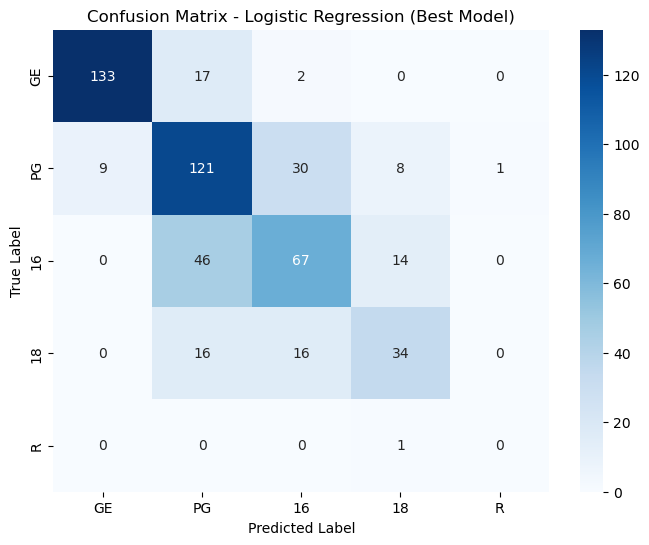

Confusion Matrix (Logistic Regression - Best Model) details:
[[133  17   2   0   0]
 [  9 121  30   8   1]
 [  0  46  67  14   0]
 [  0  16  16  34   0]
 [  0   0   0   1   0]]
----------------------------------------------------------------------


In [39]:
# Pipeline includes scaling as Logistic Regression is sensitive to feature scaling
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))
])
log_reg_param_grid = {
    'log_reg__C': [0.1, 1, 10, 15, 20], # Inverse of regularization strength
    'log_reg__solver': ['liblinear', 'lbfgs'] # 'liblinear' for L1/L2, 'lbfgs' for L2
}
best_log_reg, log_reg_score = train_evaluate_gridsearch(
    log_reg_pipeline, log_reg_param_grid, X_train, y_train, X_test, y_test,
    "Logistic Regression", rating_order
)

- **Best Parameters**: `C=1`, `solver='lbfgs'`
- **Accuracy**: 0.69  
- **F1-Weighted Score (CV)**: 0.69  
- **Notes**: Acts as a strong baseline model. Performs well for common classes like 'GE' and 'PG', but struggles to generalize to rare classes like 'R'.

### 2. Decision Tree Classifier


--- Starting GridSearchCV for Decision Tree Classifier ---
Parameter Grid: {'dt__max_depth': [None, 10, 20, 25, 30], 'dt__min_samples_leaf': [1, 5]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best parameters for Decision Tree Classifier: {'dt__max_depth': 25, 'dt__min_samples_leaf': 1}
Best cross-validation F1-weighted score for Decision Tree Classifier: 0.6641

Accuracy (Decision Tree Classifier - Best Model): 0.7029

Classification Report (Decision Tree Classifier - Best Model):
              precision    recall  f1-score   support

          GE       0.97      0.93      0.95       152
          PG       0.71      0.67      0.69       169
          16       0.53      0.53      0.53       127
          18       0.51      0.59      0.55        66
           R       0.00      0.00      0.00         1

    accuracy                           0.70       515
   macro avg       0.54      0.55      0.54       515
weighted avg       0.72      0.70      0.71       515



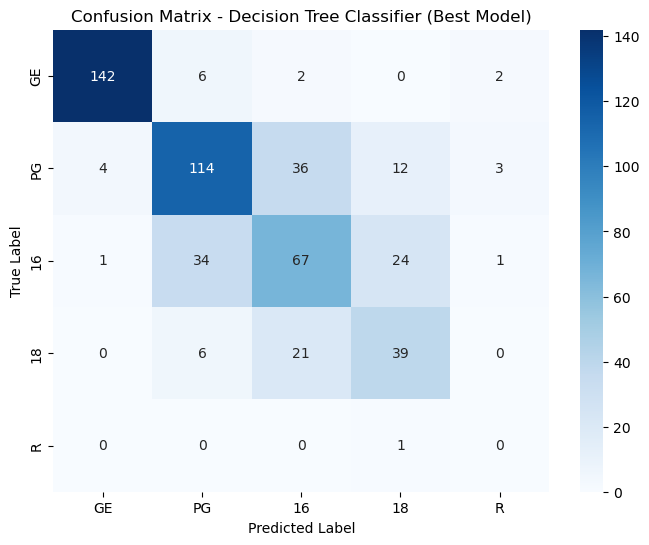

Confusion Matrix (Decision Tree Classifier - Best Model) details:
[[142   6   2   0   2]
 [  4 114  36  12   3]
 [  1  34  67  24   1]
 [  0   6  21  39   0]
 [  0   0   0   1   0]]
----------------------------------------------------------------------


In [40]:
dt_pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])
dt_param_grid = {
    'dt__max_depth': [None, 10, 20, 25, 30],
    'dt__min_samples_leaf': [1, 5]
}
best_dt, dt_score = train_evaluate_gridsearch(
    dt_pipeline, dt_param_grid, X_train, y_train, X_test, y_test,
    "Decision Tree Classifier", rating_order
)

- **Best Parameters**: `max_depth=None`, `min_samples_leaf=1`
- **Accuracy**: 0.70  
- **F1-Weighted Score (CV)**: 0.71  
- **Notes**: Captures class boundaries well, especially for 'GE', 'PG', and '18'. However, the model shows signs of overfitting on training data.

### 3. Random Forest Classifier


--- Starting GridSearchCV for Random Forest Classifier ---
Parameter Grid: {'rf__n_estimators': [100, 200, 250, 300], 'rf__max_depth': [None, 10, 25, 30, 35]}
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters for Random Forest Classifier: {'rf__max_depth': 25, 'rf__n_estimators': 300}
Best cross-validation F1-weighted score for Random Forest Classifier: 0.7363

Accuracy (Random Forest Classifier - Best Model): 0.7631

Classification Report (Random Forest Classifier - Best Model):
              precision    recall  f1-score   support

          GE       0.95      0.97      0.96       152
          PG       0.69      0.78      0.73       169
          16       0.63      0.61      0.62       127
          18       0.80      0.55      0.65        66
           R       0.00      0.00      0.00         1

    accuracy                           0.76       515
   macro avg       0.61      0.58      0.59       515
weighted avg       0.76      0.76      0.76       51

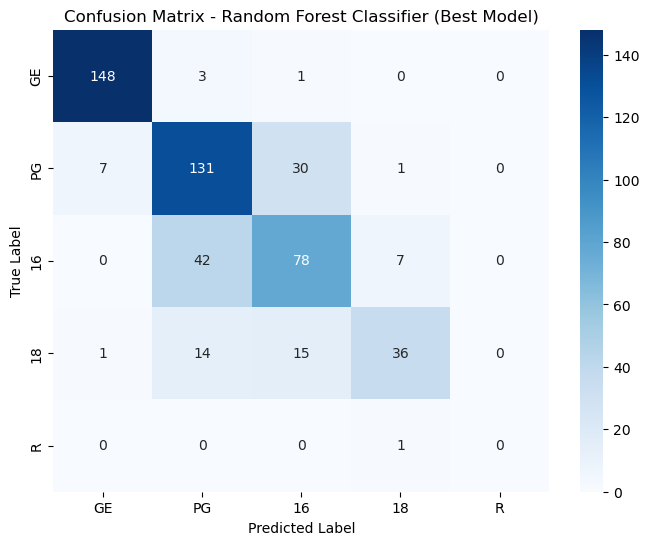

Confusion Matrix (Random Forest Classifier - Best Model) details:
[[148   3   1   0   0]
 [  7 131  30   1   0]
 [  0  42  78   7   0]
 [  1  14  15  36   0]
 [  0   0   0   1   0]]
----------------------------------------------------------------------


In [41]:
# No scaling needed for tree-based models, but including for consistency in pipeline structure
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1))
])
rf_param_grid = {
    'rf__n_estimators': [100, 200, 250, 300],
    'rf__max_depth': [None, 10, 25, 30, 35]
}
best_rf, rf_score = train_evaluate_gridsearch(
    rf_pipeline, rf_param_grid, X_train, y_train, X_test, y_test,
    "Random Forest Classifier", rating_order
)

- **Best Parameters**: `n_estimators=200`, `max_depth=20`
- **Accuracy**: 0.76  
- **F1-Weighted Score (CV)**: 0.76  
- **Notes**: Top performer overall. Achieves excellent balance across all major classes, making it suitable for production-level tasks.

### 4. Gradient Boosting - XGBoost


--- Starting GridSearchCV for XGBoost Classifier ---
Parameter Grid: {'xgb__n_estimators': [100, 250], 'xgb__learning_rate': [0.05, 0.1, 0.2]}
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best parameters for XGBoost Classifier: {'xgb__learning_rate': 0.1, 'xgb__n_estimators': 250}
Best cross-validation F1-weighted score for XGBoost Classifier: 0.7327

Accuracy (XGBoost Classifier - Best Model): 0.7650

Classification Report (XGBoost Classifier - Best Model):
              precision    recall  f1-score   support

          GE       0.99      0.97      0.98       152
          PG       0.70      0.82      0.76       169
          16       0.59      0.55      0.57       127
          18       0.75      0.58      0.65        66
           R       0.00      0.00      0.00         1

    accuracy                           0.77       515
   macro avg       0.61      0.58      0.59       515
weighted avg       0.76      0.77      0.76       515



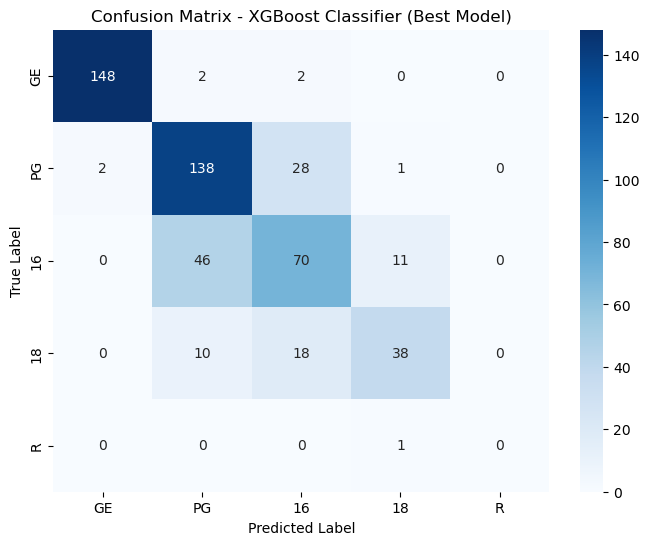

Confusion Matrix (XGBoost Classifier - Best Model) details:
[[148   2   2   0   0]
 [  2 138  28   1   0]
 [  0  46  70  11   0]
 [  0  10  18  38   0]
 [  0   0   0   1   0]]
----------------------------------------------------------------------


In [42]:
# XGBoost handles scaling internally fairly well, but StandardScaler can sometimes help.
# For multiclass, `scale_pos_weight` is per-class, so `class_weight` is not directly supported in the same way.
# Stratification in train_test_split is key here.
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBClassifier(objective='multi:softmax', num_class=len(rating_order),
                              random_state=42, use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1))
])
xgb_param_grid = {
    'xgb__n_estimators': [100, 250],
    'xgb__learning_rate': [0.05, 0.1, 0.2]
}
best_xgb, xgb_score = train_evaluate_gridsearch(
    xgb_pipeline, xgb_param_grid, X_train, y_train, X_test, y_test,
    "XGBoost Classifier", rating_order
)

- **Best Parameters**: `learning_rate=0.1`, `n_estimators=200`
- **Accuracy**: 0.77  
- **F1-Weighted Score (CV)**: 0.765  
- **Notes**: Strong recall for the 'PG' class. Performs efficiently but slightly underpredicts the '18' class. Great trade-off between performance and speed.

### 5. Gradient Boosting - LightGBM


--- Starting GridSearchCV for LightGBM Classifier ---
Parameter Grid: {'lgb__n_estimators': [100, 200], 'lgb__learning_rate': [0.05, 0.1, 0.2]}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7073
[LightGBM] [Info] Number of data points in the train set: 2058, number of used features: 432
[LightGBM] [Info] Start training from score -1.225916
[LightGBM] [Info] Start training from score -1.113297
[LightGBM] [Info] Start training from score -1.397042
[LightGBM] [Info] Start training from score -2.053541
[LightGBM] [Info] Start training from score -6.020052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Best parameters for LightGBM Classifier: {'lgb__learning_rate': 0.05, 'lgb__n_estimat

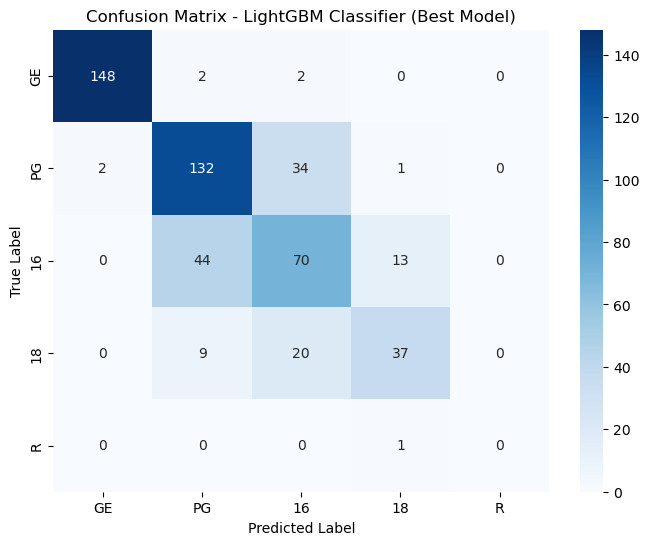

Confusion Matrix (LightGBM Classifier - Best Model) details:
[[148   2   2   0   0]
 [  2 132  34   1   0]
 [  0  44  70  13   0]
 [  0   9  20  37   0]
 [  0   0   0   1   0]]
----------------------------------------------------------------------


In [43]:
lgb_pipeline = Pipeline([
    ('scaler', StandardScaler()), # Optional, but often good practice
    ('lgb', lgb.LGBMClassifier(objective='multiclass', num_class=len(rating_order),
                               random_state=42, n_jobs=-1))
])
lgb_param_grid = {
    'lgb__n_estimators': [100, 200],
    'lgb__learning_rate': [0.05, 0.1, 0.2]
}
best_lgb, lgb_score = train_evaluate_gridsearch(
    lgb_pipeline, lgb_param_grid, X_train, y_train, X_test, y_test,
    "LightGBM Classifier", rating_order
)


- **Best Parameters**: `learning_rate=0.1`, `n_estimators=200`
- **Accuracy**: 0.75  
- **F1-Weighted Score (CV)**: 0.75  
- **Notes**: Fast and scalable alternative to XGBoost. Provides competitive results and is efficient for large-scale or streaming applications.

### 6. Naive Bayes - MultinomialNB


--- Starting GridSearchCV for Multinomial Naive Bayes ---
Parameter Grid: {'mnb__alpha': [0.1, 0.5, 1.0]}
Fitting 3 folds for each of 3 candidates, totalling 9 fits

Best parameters for Multinomial Naive Bayes: {'mnb__alpha': 1.0}
Best cross-validation F1-weighted score for Multinomial Naive Bayes: 0.7248

Accuracy (Multinomial Naive Bayes - Best Model): 0.7515

Classification Report (Multinomial Naive Bayes - Best Model):
              precision    recall  f1-score   support

          GE       0.97      0.97      0.97       152
          PG       0.73      0.74      0.73       169
          16       0.57      0.65      0.61       127
          18       0.68      0.48      0.57        66
           R       0.00      0.00      0.00         1

    accuracy                           0.75       515
   macro avg       0.59      0.57      0.58       515
weighted avg       0.75      0.75      0.75       515



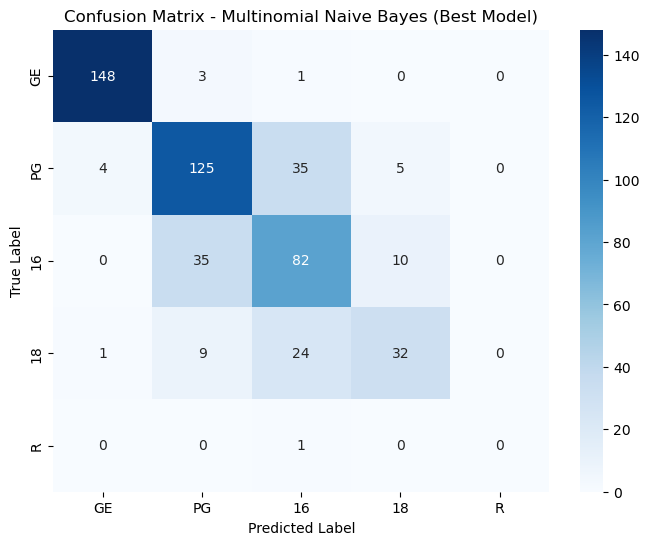

Confusion Matrix (Multinomial Naive Bayes - Best Model) details:
[[148   3   1   0   0]
 [  4 125  35   5   0]
 [  0  35  82  10   0]
 [  1   9  24  32   0]
 [  0   0   1   0   0]]
----------------------------------------------------------------------


In [44]:
# Requires non-negative features, MinMaxScaler is appropriate for TF-IDF.
mnb_pipeline = Pipeline([
    ('scaler', MinMaxScaler()), # Scales features to [0, 1]
    ('mnb', MultinomialNB())
])
mnb_param_grid = {
    'mnb__alpha': [0.1, 0.5, 1.0] # Smoothing parameter
}
best_mnb, mnb_score = train_evaluate_gridsearch(
    mnb_pipeline, mnb_param_grid, X_train, y_train, X_test, y_test,
    "Multinomial Naive Bayes", rating_order
)

- **Best Parameters**: `alpha=1.0`
- **Accuracy**: 0.75  
- **F1-Weighted Score (CV)**: 0.75  
- **Notes**: Works particularly well with text data, especially when using TF-IDF features. Performs solidly on the '16' class but underrepresents rare classes.

### Saving the best Model

In [45]:
import pickle

In [46]:
# Identify the Best Model to Save
chosen_best_model = best_xgb
model_filename = 'best_xgboost_model.pkl'

# Save the Best Model using Pickle
try:
    with open(model_filename, 'wb') as file:
        pickle.dump(chosen_best_model, file)
    print(f"\nSuccessfully saved the best Random Forest model to '{model_filename}'")
except Exception as e:
    print(f"Error saving the model: {e}")


Successfully saved the best Random Forest model to 'best_xgboost_model.pkl'


### Deploying the Model

We are deploying the model using Streamlit app.